# DSME6756IA - Group Project

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
df = pd.read_csv('UCI_Credit_Card.csv')

## 1. Dataset Exploration

### Dataset Description

This dataset contains 30,000 credit card records and 25 variables showing the information of the credit card clients, for example demographic factors, credit data, history of payment, and bill statements:

- 1 variable to accommodate the client ID
- 9 categorical variables,
- 14 continuous variables, and
- 1 target variable

Although all column type is numeric, there are several categorical variables, including 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'. In this project, the target variable is default payment (1=yes, 0=no), aka 'default.payment.next.month'

In [3]:
#General Insight
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

### Imbalanced Dataset

In the dataset, only 22% of clients are defaulted at the end. It implies that this dataset is imbalanced, meaning that most of the credit card transactions are not defaulted, and a very few classes are defaulted transactions. It will bias the predictive models, so it is necessary to address this issue using random resampling, under-sampling
and/or over-sampling later.

In [86]:
#Overall default probability
print('Overall Default Probability = {:.2%}'.format(df['default.payment.next.month'].mean()))

Overall Default Probability = 22.12%


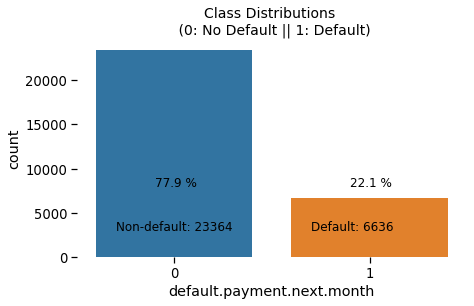

In [3]:
# The frequency of defaults
yes = df['default.payment.next.month'].sum()
no = len(df)-yes

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot(x='default.payment.next.month',data=df) #Optional: palette="Blues"
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('Class Distributions \n (0: No Default || 1: Default)', size=14)
#Removing the frame
plt.box(False)


### Missing Value

There is no missing value in the entire dataset.

In [31]:
#Show the number of missing value per columns
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### Relationship between Variables

Most of the variables are uncorrelated, which is shown in the correlation matrix below (the cell highlighted in blue).

Only the repayment status and bill amount in one period are highly correlated to their historical status/value with descending rate. For example, the repayment status (Bill amount) in September 2005 is more positively correlated to one in August 2005 comparing with April 2005.

**For reference**

<ins>Repayment Status</ins>
- PAY_0: Repayment status in September 2005
- PAY_2: Repayment status in August 2005
- PAY_3: Repayment status in July 2005
- PAY_4: Repayment status in June 2005
- PAY_5: Repayment status in May 2005
- PAY_6: Repayment status in April 2005

<ins>Bill Amount</ins>
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

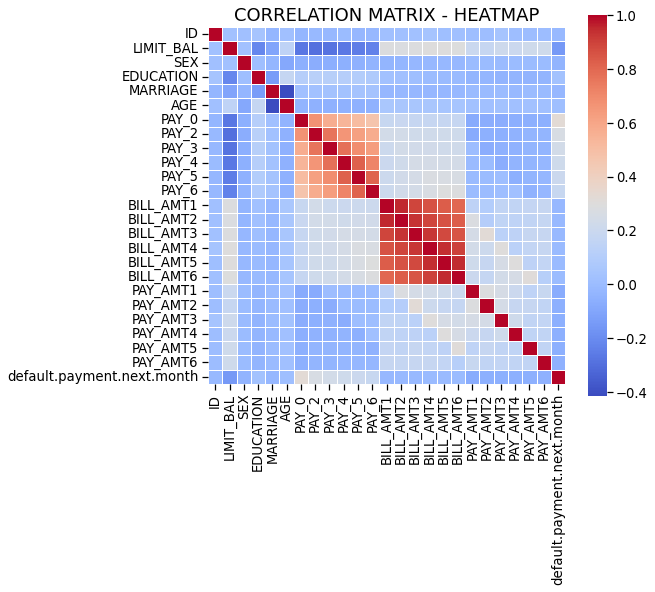

In [45]:
corr = df.corr() # .corr is used to find corelation
fig,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [32]:
matrix = df.corr()
matrix.style.background_gradient(cmap='coolwarm')

### Categorical Variable

**Overview**

In [33]:
#Data description for categorical variables only
df_Cat=df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
df_Cat.describe()

SEX     EDUCATION      MARRIAGE         PAY_0         PAY_2  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       1.603733      1.853133      1.551867     -0.016700     -0.133767   
std        0.489129      0.790349      0.521970      1.123802      1.197186   
min        1.000000      0.000000      0.000000     -2.000000     -2.000000   
25%        1.000000      1.000000      1.000000     -1.000000     -1.000000   
50%        2.000000      2.000000      2.000000      0.000000      0.000000   
75%        2.000000      2.000000      2.000000      0.000000      0.000000   
max        2.000000      6.000000      3.000000      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6  
count  30000.000000  30000.000000  30000.000000  30000.000000  
mean      -0.166200     -0.220667     -0.266200     -0.291100  
std        1.196868      1.169139      1.133187      1.149988  
min       -2.000000     -2.000000     -2.000000     -2.000000  
25%       -1.000000     -1.000000     -1.000000     -1.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000  
max        8.000000      8.000000      8.000000      8.000000

**Correlation with Target Variable**

In [34]:
#Correlation Matrix (including target variable)
df_Cat2 = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default.payment.next.month']]
matrix = df_Cat2.corr()
matrix.style.background_gradient(cmap='coolwarm')

**Quick View of Categorical Variables**

**Abnormal Data**

According to the graph below, there are some abnormal data in the categorical variables.

- **'EDUCATION'**: Undocumented/unlabelled values, which are '0', '5' and '6'.
- **'MARRIAGE'**: Undocumented value (i.e. '0') as well.
- **'PAY_0'/'PAY_2'/'PAY_3'/'PAY_4'/'PAY_5'/'PAY_6'**: Undocumented value of '-2' and '0' should be labelled for all negative value to represent 'pay duly'.

<AxesSubplot:xlabel='PAY_6', ylabel='count'>

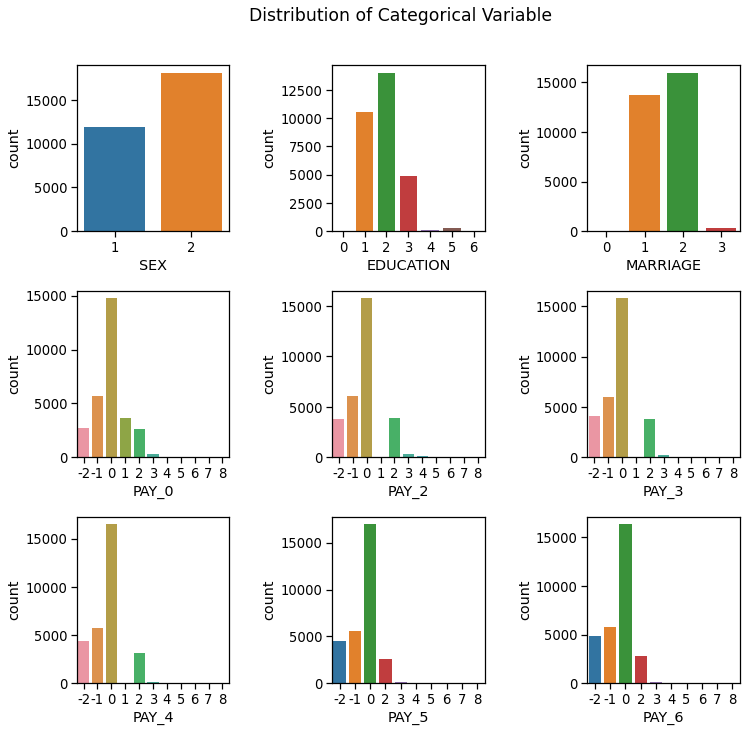

In [67]:
fig, ax =plt.subplots(3,3, figsize=(10, 10)) #create 3x3 subplots
fig.tight_layout(pad=0.4, w_pad=4.0, h_pad=2.5) #adjust the spacing between subplots
fig.subplots_adjust(top=0.9) #adjust title position
fig.suptitle('Distribution of Categorical Variable') #main title

#Plot a graph for the distribution of each categorical variables
sns.countplot(x='SEX',data=df, ax=ax[0,0])
sns.countplot(x='EDUCATION',data=df, ax=ax[0,1])
sns.countplot(x='MARRIAGE',data=df, ax=ax[0,2])
sns.countplot(x='PAY_0',data=df, ax=ax[1,0])
sns.countplot(x='PAY_2',data=df, ax=ax[1,1])
sns.countplot(x='PAY_3',data=df, ax=ax[1,2])
sns.countplot(x='PAY_4',data=df, ax=ax[2,0])
sns.countplot(x='PAY_5',data=df, ax=ax[2,1])
sns.countplot(x='PAY_6',data=df, ax=ax[2,2])

**Further observations**

- There are more females credit card holder and the number of defaulter have high proportion of females.

- Number of defaulters have a higher proportion of educated people (graduate school and university)

- Number of defaulters have a higher proportion of singles.

<Figure size 720x360 with 0 Axes>

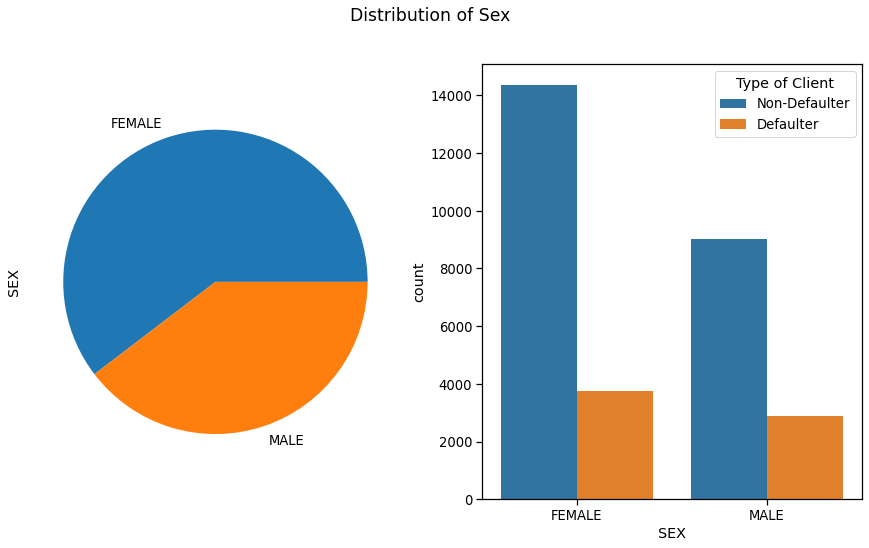

<Figure size 720x360 with 0 Axes>

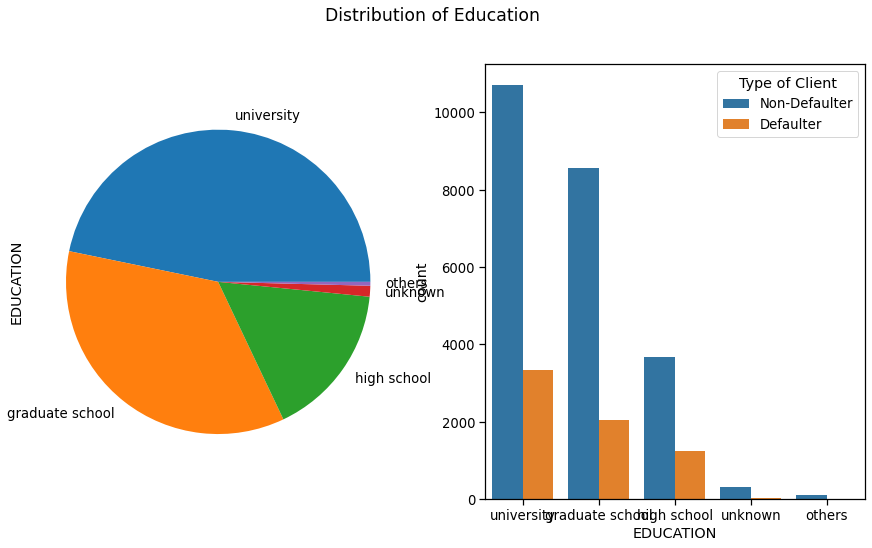

<Figure size 720x360 with 0 Axes>

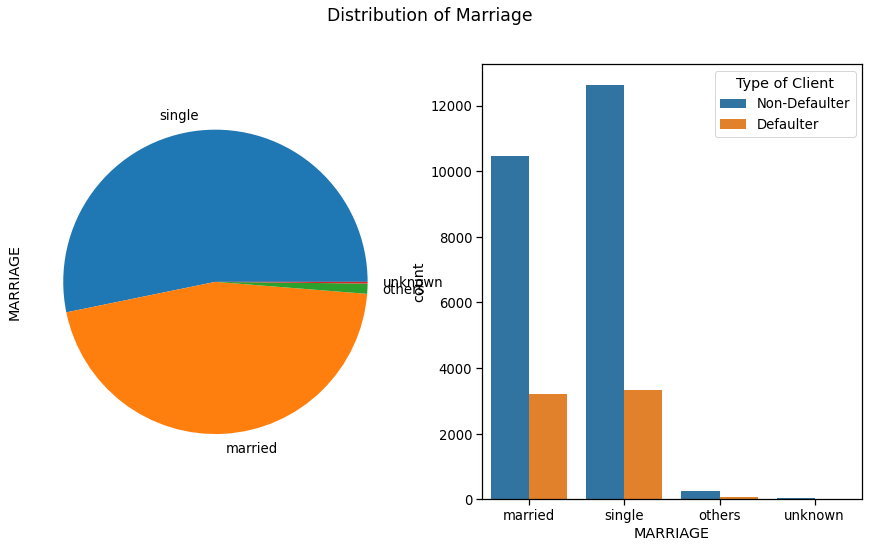

In [32]:
#Plotting categorical features - Sex, Education and Marriage
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

df_Cat3 = df.loc[:,categorical_features]
df_Cat3.loc[:,'Defaulter'] = df.loc[:,'default.payment.next.month']

df_Cat3.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 0:'unknown',5:'unknown',6:'unknown'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others',0:'unknown'}}, inplace = True)

for col in categorical_features:
    plt.figure(figsize=(10,5))
    fig, axes = plt.subplots(ncols=2,figsize=(15,8))
    fig.suptitle('Distribution of ' + col.title()) #main title
    
    #Pie chart
    df_Cat3.loc[:,col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
    
    #Count plot
    sns.countplot(x = col, hue = 'Defaulter', data = df_Cat3)
    plt.legend(title='Type of Client', loc='upper right', labels=['Non-Defaulter', 'Defaulter'])

**Further observations**

During April-August 2005, the repayment status remained stable for both defaulters and non-defaulters. During the period, most of non-defaulters paid the bill in advance or on time while defaulters will more likely to pay the bill on time or two months late.

In September 2005, the repayment status changed. Both defaulters and non-defaulters paid the bill more late. More non-defaulters and defaulters paid the bill 1-2 months late and 3 months late respectively.


**For reference**

<ins>Repayment Status</ins>
- PAY_0: Repayment status in September 2005
- PAY_2: Repayment status in August 2005
- PAY_3: Repayment status in July 2005
- PAY_4: Repayment status in June 2005
- PAY_5: Repayment status in May 2005
- PAY_6: Repayment status in April 2005

<ins>Labels</ins>
- 0 or below: pay duly
- 1: payment delay for one month
- 2: payment delay for two months, 
- … 
- 8: payment delay for eight months,
- 9: payment delay for nine months and above

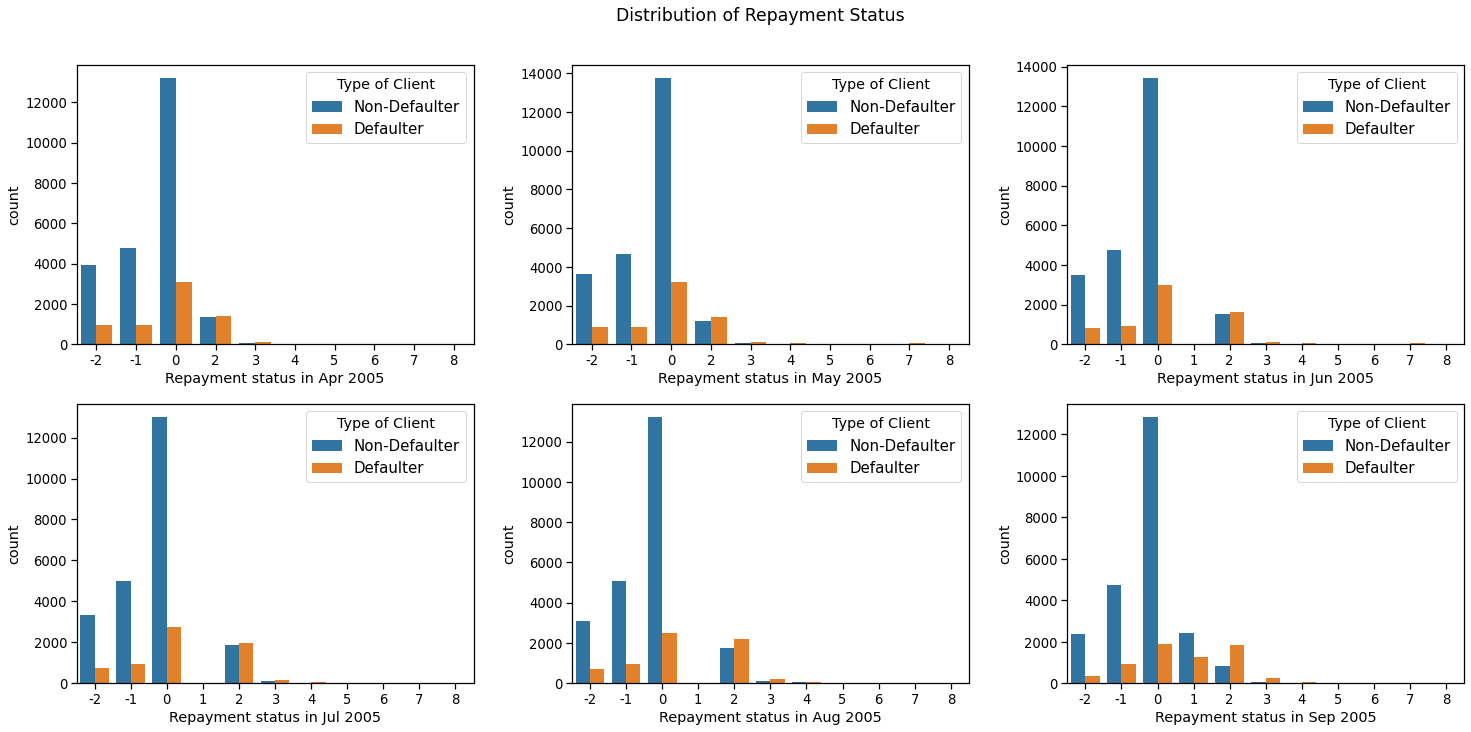

In [33]:
#Plotting categorical features - Repayment Status
fig, ax =plt.subplots(2,3, figsize=(20, 10)) #create 2x3 subplots
fig.tight_layout(pad=0.4, w_pad=4.0, h_pad=2.5) #adjust the spacing between subplots
fig.subplots_adjust(top=0.9) #adjust title position
fig.suptitle('Distribution of Repayment Status') #main title

sns.countplot(x='PAY_6',data=df, hue='default.payment.next.month', ax=ax[0,0]).set_xlabel('Repayment status in Apr 2005')
sns.countplot(x='PAY_5',data=df, hue='default.payment.next.month', ax=ax[0,1]).set_xlabel('Repayment status in May 2005')
sns.countplot(x='PAY_4',data=df, hue='default.payment.next.month', ax=ax[0,2]).set_xlabel('Repayment status in Jun 2005')
sns.countplot(x='PAY_3',data=df, hue='default.payment.next.month', ax=ax[1,0]).set_xlabel('Repayment status in Jul 2005')
sns.countplot(x='PAY_2',data=df, hue='default.payment.next.month', ax=ax[1,1]).set_xlabel('Repayment status in Aug 2005')
sns.countplot(x='PAY_0',data=df, hue='default.payment.next.month', ax=ax[1,2]).set_xlabel('Repayment status in Sep 2005')

for i, ax in enumerate(fig.axes):
    ax.legend(title="Type of Client",labels=['Non-Defaulter','Defaulter'],loc='upper right',fontsize=15)


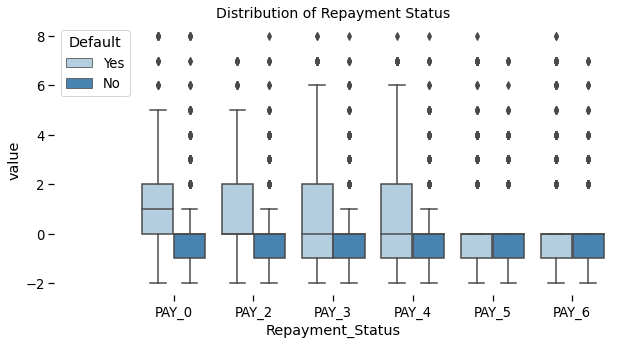

In [25]:
Repayment = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
y=df['default.payment.next.month']

Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars='default.payment.next.month',
                    var_name="Repayment_Status",
                    value_name='value')

Repayment.replace({'default.payment.next.month': {0 : 'No', 1 : 'Yes'}},inplace=True)
                 
plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue='default.payment.next.month', data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('Distribution of Repayment Status', size=14)
plt.box(False)
#plt.savefig('ImageName', format='png', dpi=200) 

### Numerical Variable

**Overview**

In [13]:
#Data description for numerical variables only
df_Num = df.loc[:, ~df.columns.isin(['ID','SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])]
df_Num.describe()
       

LIMIT_BAL           AGE      BILL_AMT1      BILL_AMT2  \
count    30000.000000  30000.000000   30000.000000   30000.000000   
mean    167484.322667     35.485500   51223.330900   49179.075167   
std     129747.661567      9.217904   73635.860576   71173.768783   
min      10000.000000     21.000000 -165580.000000  -69777.000000   
25%      50000.000000     28.000000    3558.750000    2984.750000   
50%     140000.000000     34.000000   22381.500000   21200.000000   
75%     240000.000000     41.000000   67091.000000   64006.250000   
max    1000000.000000     79.000000  964511.000000  983931.000000   

          BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   4.701315e+04   43262.948967   40311.400967   38871.760400   
std    6.934939e+04   64332.856134   60797.155770   59554.107537   
min   -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    2.666250e+03    2326.750000    1763.000000    1256.000000   
50%    2.008850e+04   19052.000000   18104.500000   17071.000000   
75%    6.016475e+04   54506.000000   50190.500000   49198.250000   
max    1.664089e+06  891586.000000  927171.000000  961664.000000   

            PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  default.payment.next.month  
count   30000.000000   30000.000000                30000.000000  
mean     4799.387633    5215.502567                    0.221200  
std     15278.305679   17777.465775                    0.415062  
min         0.000000       0.000000                    0.000000  
25%       252.500000     117.750000                    0.000000  
50%      1500.000000    1500.000000                    0.000000  
75%      4031.500000    4000.000000                    0.000000  
max    426529.000000  528666.000000                    1.000000

**Quick View of Numerical Variables**

**Bill Amount**

**Correlation with Target Variable**

In [14]:
#Only select the columns related to Bill Amount
df_BillAmt = df.loc[:, df.columns.isin(['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6','default.payment.next.month'])]

#Correlation Matrix (including target variable)
matrix = df_BillAmt.corr()
matrix.style.background_gradient(cmap='coolwarm')

**Further observations**

In general, the bill amount increased sharply along with the date during April-September 2005.

Text(0, 0.5, 'Bill Statement\n (1: Latest || 6: Oldest)')

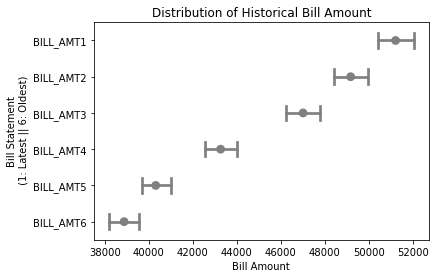

In [15]:
#Change dataframe layout from wide to long
df_BillAmt2=pd.melt(df, id_vars='ID', value_vars=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6'],var_name='Bill Statement', value_name='Bill Amount')

#Plot a pointplot for the distribution of bill amount in each month
sns.pointplot(
    data=df_BillAmt2, x="Bill Amount", y="Bill Statement",
    errorbar=("pi", 100), capsize=.4, join=False, color=".5").set(title='Distribution of Historical Bill Amount')

plt.ylabel('Bill Statement\n (1: Latest || 6: Oldest)')

Interestingly, the bill amount of non-defaulters are larger than defaulters in each month during April-September 2005.

In [16]:
import matplotlib.lines as mlines

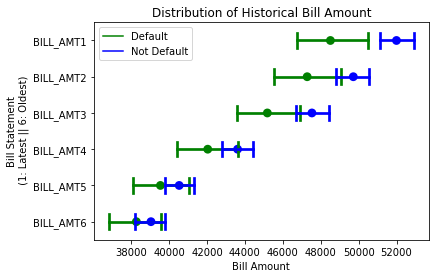

In [14]:
#Similar graphs as above but separate the distribution for defaulted customer and non-defaulted customer

#Plot setting
Default = mlines.Line2D([], [], color='green', label='Default')
NotDefault = mlines.Line2D([], [], color='blue', label='Not Default')

#Change dataframe layout from wide to long for defaulted customer
df_BillDefault=pd.melt(df[df['default.payment.next.month']==1], id_vars='ID', value_vars=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6'],var_name='Bill Statement', value_name='Bill Amount')

sns.pointplot(
    data=df_BillDefault, x="Bill Amount", y="Bill Statement",
    errorbar=("pi", 100), capsize=.4, join=False, color="g").set(title='Distribution of Historical Bill Amount')

#Change dataframe layout from wide to long for non-defaulted customer
df_BillNotDefault=pd.melt(df[df['default.payment.next.month']==0], id_vars='ID', value_vars=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6'],var_name='Bill Statement', value_name='Bill Amount')

sns.pointplot(
    data=df_BillNotDefault, x="Bill Amount", y="Bill Statement",
    errorbar=("pi", 100), capsize=.4, join=False, color="b").set(title='Distribution of Historical Bill Amount')

#Plot setting
plt.ylabel('Bill Statement\n (1: Latest || 6: Oldest)')
plt.legend(handles=[Default, NotDefault])


**Payment Amount**

**Correlation with Target Variable**

In [17]:
#Only select the columns related to Historical Payment
df_PayAmt = df.loc[:, df.columns.isin(['PAY_AMT1', 'PAY_AMT2','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6','default.payment.next.month'])]

#Correlation Matrix (including target variable)
matrix = df_PayAmt.corr()
matrix.style.background_gradient(cmap='coolwarm')

**Further observations**

There is no obvious pattern between the payment amount in different periods. But we can see that the payment amount increased from May 2005 to August 2005 and suddenly dropped in September 2005.

Text(0, 0.5, 'Payment Statement\n (1: Latest || 6: Oldest)')

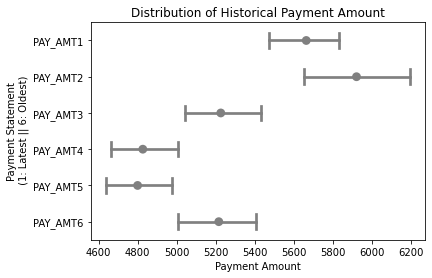

In [16]:
#Change dataframe layout from wide to long
df_PayAmt2=pd.melt(df, id_vars='ID', value_vars=['PAY_AMT1', 'PAY_AMT2','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6'],var_name='Payment Statement', value_name='Payment Amount')

#Plot a pointplot for the distribution of payment amount in each month
sns.pointplot(
    data=df_PayAmt2, x="Payment Amount", y="Payment Statement",
    errorbar=("pi", 100), capsize=.4, join=False, color=".5").set(title='Distribution of Historical Payment Amount')

plt.ylabel('Payment Statement\n (1: Latest || 6: Oldest)')


From the above graph (Distribution of Historical Bill Amount), it shows that the bill amount of defaulters were slightly smaller than non-defaulters. However, in the graph below, we know that there were a larger gap between payment amount of defaulters and non-defaulters. Therefore, it indicates that defaulters paid fewer amount comparing with non-defaulters even though the bill amounts were similar.

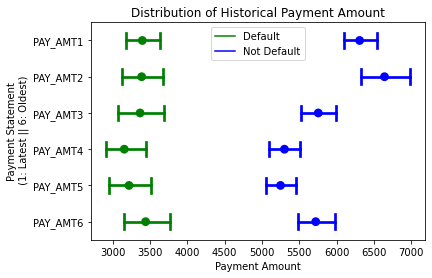

In [17]:
#Similar graphs as above but separate the distribution for defaulted customer and non-defaulted customer

#Plot setting
Default = mlines.Line2D([], [], color='green', label='Default')
NotDefault = mlines.Line2D([], [], color='blue', label='Not Default')

#Change dataframe layout from wide to long for defaulted customer
df_PayDefault=pd.melt(df[df['default.payment.next.month']==1], id_vars='ID', value_vars=['PAY_AMT1', 'PAY_AMT2','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6'],var_name='Payment Statement', value_name='Payment Amount')

sns.pointplot(
    data=df_PayDefault, x="Payment Amount", y="Payment Statement",
    errorbar=("pi", 100), capsize=.4, join=False, color="g").set(title='Distribution of Historical Payment Amount')

#Change dataframe layout from wide to long for non-defaulted customer
df_PayNotDefault=pd.melt(df[df['default.payment.next.month']==0], id_vars='ID', value_vars=['PAY_AMT1', 'PAY_AMT2','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6'],var_name='Payment Statement', value_name='Payment Amount')

sns.pointplot(
    data=df_PayNotDefault, x="Payment Amount", y="Payment Statement",
    errorbar=("pi", 100), capsize=.4, join=False, color="b").set(title='Distribution of Historical Payment Amount')

#Plot setting
plt.ylabel('Payment Statement\n (1: Latest || 6: Oldest)')
plt.legend(handles=[Default, NotDefault])

**Credit Limit & Age**

**Correlation with Target Variable**

In [3]:
matrix = df[['LIMIT_BAL','AGE','default.payment.next.month']].corr()
matrix.style.background_gradient(cmap='coolwarm')

**Further Observation**



Distribution of age for both defaulter and non-defaulters are similar. Most of them aged 25-35 and the average age are around 35.

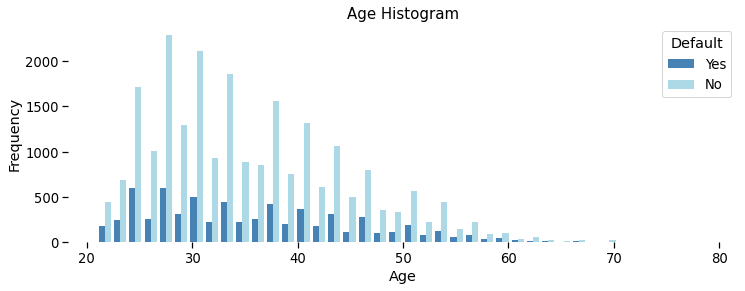

In [20]:
x1 = list(df[df['default.payment.next.month'] == 1]['AGE'])
x2 = list(df[df['default.payment.next.month'] == 0]['AGE'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram', size=15)
#plt.box(False)
#plt.savefig('ImageName', format='png', dpi=200, transparent=True) #Save the current figure

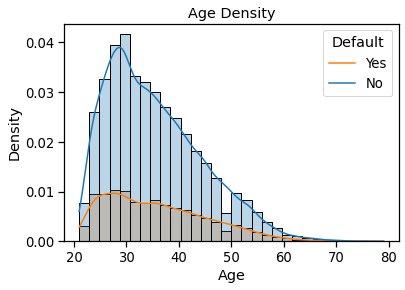

In [61]:
sns.histplot(data=df, x='AGE',hue='default.payment.next.month', stat="density",kde=True,alpha=0.3,bins=30).set(title='Age Density')
plt.xlabel('Age')
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')


In [4]:
#Average age among defaulter and non-defaulter
df.groupby('default.payment.next.month')['AGE'].mean()

default.payment.next.month
0    35.417266
1    35.725738
Name: AGE, dtype: float64

Distribution of credit limit for both defaulter and non-defaulters are similar. Most of their credit balance are not relatively high. Average credit limit for non-defaulter is higher, which is NT\\$178,100 while that of defaulter is NT\\$130,110.

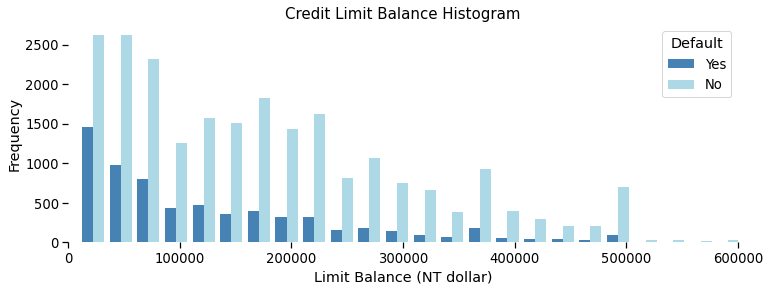

In [23]:
x1 = list(df[df['default.payment.next.month'] == 1]['LIMIT_BAL'])
x2 = list(df[df['default.payment.next.month'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('Credit Limit Balance Histogram', size=15)
#plt.box(False)
#plt.savefig('ImageName', format='png', dpi=200, transparent=True) #Save the current figure

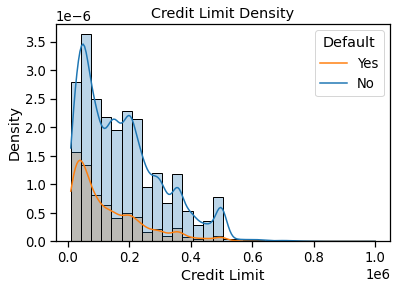

In [62]:
sns.histplot(data=df, x='LIMIT_BAL',hue='default.payment.next.month', stat="density",kde=True,alpha=0.3,bins=30).set(title='Credit Limit Density')
plt.xlabel('Credit Limit')
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')


In [5]:
df.groupby('default.payment.next.month')['LIMIT_BAL'].mean()

default.payment.next.month
0    178099.726074
1    130109.656420
Name: LIMIT_BAL, dtype: float64

## 2. Data Cleaning

### Column Removal

In [3]:
df.drop('ID',axis = 1, inplace = True)

#For double checking
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 24 columns]

### Column Renaming

In [4]:
#renaming for better convenience
df.rename(columns={'default.payment.next.month': 'IsDefaulter'},inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

#For double checking
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0    20000.0    2          2         1   24         2        2       -1   
1   120000.0    2          2         2   26        -1        2        0   
2    90000.0    2          2         2   34         0        0        0   
3    50000.0    2          2         1   37         0        0        0   
4    50000.0    1          2         1   57        -1        0       -1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0       -1       -2  ...           0.0           0.0           0.0   
1        0        0  ...        3272.0        3455.0        3261.0   
2        0        0  ...       14331.0       14948.0       15549.0   
3        0        0  ...       28314.0       28959.0       29547.0   
4        0        0  ...       20940.0       19146.0       19131.0   

   PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0           0.0        689.0          0.0          0.0          0.0   
1           0.0       1000.0       1000.0       1000.0          0.0   
2        1518.0       1500.0       1000.0       1000.0       1000.0   
3        2000.0       2019.0       1200.0       1100.0       1069.0   
4        2000.0      36681.0      10000.0       9000.0        689.0   

   PAY_AMT_APR  IsDefaulter  
0          0.0            1  
1       2000.0            1  
2       5000.0            0  
3       1000.0            0  
4        679.0            0  

[5 rows x 24 columns]

### Fixing Abnormal Value

As seen previously, some categories are mislabeled or undocumented. Before modelling, we need to first fix it.

**Education Variable**

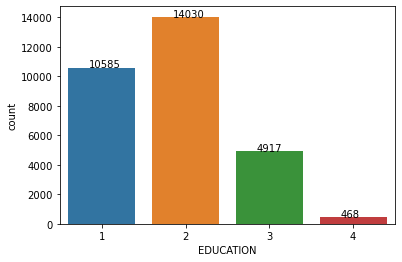

In [5]:
#'EDUCATION': Undocumented/unlabelled values, which are '0', '5' and '6'
#Those value can also be put in a 'Other' cathegory (thus 4)

fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4

#df.EDUCATION.value_counts() #for checking

ax = sns.countplot(x='EDUCATION', data=df)

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
plt.show()

#(1=graduate school, 2=university, 3=high school, 4=others)

**Marriage Variable**

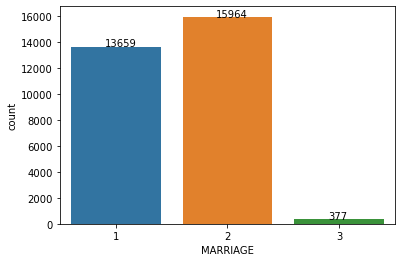

In [6]:
#'MARRIAGE': Undocumented value (i.e. '0') as well
#It can be safely categorized as 'Other' (thus 3)

df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

#df.MARRIAGE.value_counts() #for checking

ax = sns.countplot(x='MARRIAGE', data=df)

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.01))
    
plt.show()


**Repayment Status Variable**

PAY_n variables indicate the number of months of delay and indicates "pay duly"with -1. And there are undocumented value of '-2'. It is better to adjust those values to 0 for pay duly.

In [7]:
#'PAY_0'/'PAY_2'/'PAY_3'/'PAY_4'/'PAY_5'/'PAY_6': Undocumented value of '-2' and '0' should be labelled for all negative value to represent 'pay duly'.
fil = (df.PAY_SEPT == -2) | (df.PAY_SEPT == -1)
df.loc[fil, 'PAY_SEPT'] = 0

fil = (df.PAY_AUG == -2) | (df.PAY_AUG == -1)
df.loc[fil, 'PAY_AUG'] = 0

fil = (df.PAY_JUL == -2) | (df.PAY_JUL == -1)
df.loc[fil, 'PAY_JUL'] = 0

fil = (df.PAY_JUN == -2) | (df.PAY_JUN == -1)
df.loc[fil, 'PAY_JUN'] = 0

fil = (df.PAY_MAY == -2) | (df.PAY_MAY == -1)
df.loc[fil, 'PAY_MAY'] = 0

fil = (df.PAY_APR == -2) | (df.PAY_APR == -1)
df.loc[fil, 'PAY_APR'] = 0


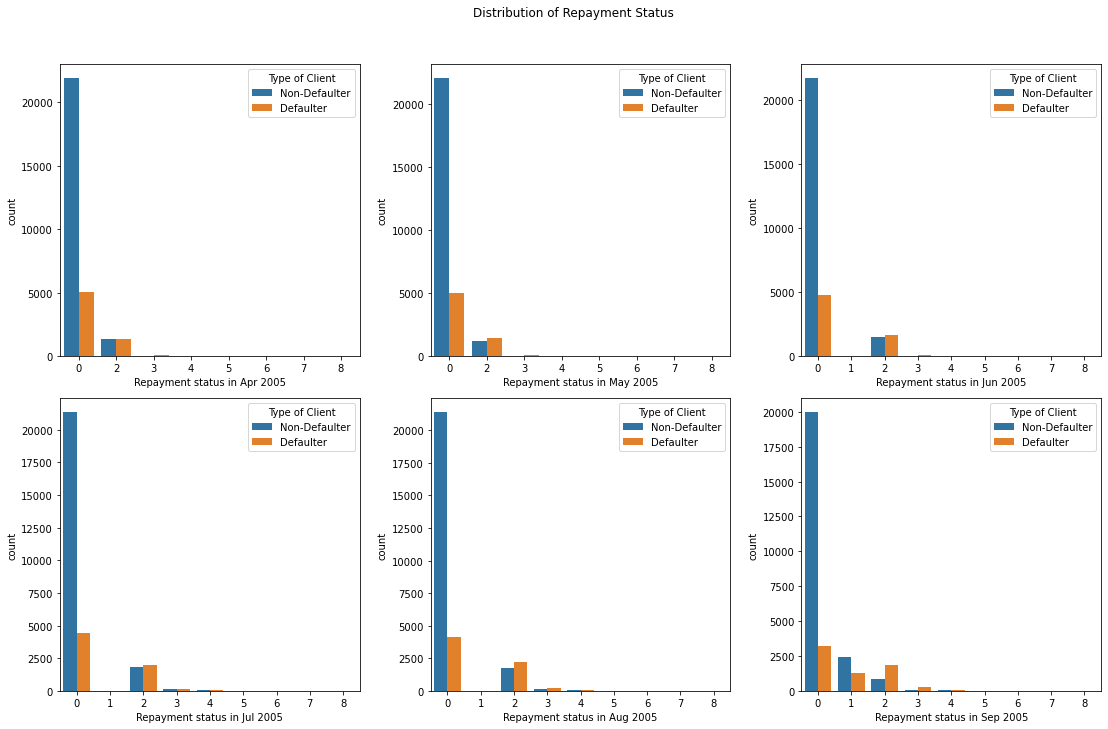

In [8]:
#Plotting categorical features - Repayment Status
fig, ax =plt.subplots(2,3, figsize=(15, 10)) #create 2x3 subplots
fig.tight_layout(pad=0.4, w_pad=4.0, h_pad=2.5) #adjust the spacing between subplots
fig.subplots_adjust(top=0.9) #adjust title position
fig.suptitle('Distribution of Repayment Status') #main title

sns.countplot(x='PAY_APR',data=df, hue='IsDefaulter', ax=ax[0,0]).set_xlabel('Repayment status in Apr 2005')
sns.countplot(x='PAY_MAY',data=df, hue='IsDefaulter', ax=ax[0,1]).set_xlabel('Repayment status in May 2005')
sns.countplot(x='PAY_JUN',data=df, hue='IsDefaulter', ax=ax[0,2]).set_xlabel('Repayment status in Jun 2005')
sns.countplot(x='PAY_JUL',data=df, hue='IsDefaulter', ax=ax[1,0]).set_xlabel('Repayment status in Jul 2005')
sns.countplot(x='PAY_AUG',data=df, hue='IsDefaulter', ax=ax[1,1]).set_xlabel('Repayment status in Aug 2005')
sns.countplot(x='PAY_SEPT',data=df, hue='IsDefaulter', ax=ax[1,2]).set_xlabel('Repayment status in Sep 2005')

for i, ax in enumerate(fig.axes):
    ax.legend(title="Type of Client",labels=['Non-Defaulter','Defaulter'],loc='upper right')


### Oversampling Technique

As we have seen earlier that we have imbalanced dataset. **SMOTE (Synthetic Minority Oversampling Technique)** is selected to minimize its negative effect on modelling.

**Oversampling** has the disadvantage of increasing the likelihood of overfitting since it replicates the minority class event. It usually outperform the downsampling.

**Undersampling** can discard potentially useful information and the sample can be biased, but it helps improving the run time

To create a synthetic sample, **SMOTE** algorithm is more appropriate approach. SMOTE is an oversampling method which creates syntetic samples from the minority class instead of creating copies. It selects 2 or more similar instances and perturb them one at a time by random amount. This techniques should avoid overfitting problems but it risks adding noise to the model.

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
smote = SMOTE(random_state=101)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


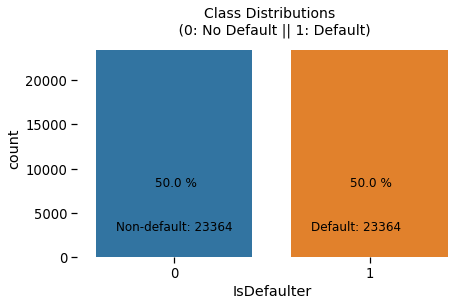

In [11]:
# The frequency of defaults
yes = y_smote.sum()
no = len(y_smote)-yes

# Percentage
yes_perc = round(yes/len(y_smote)*100, 1)
no_perc = round(no/len(y_smote)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot(x=y_smote) #Optional: palette="Blues"
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('Class Distributions \n (0: No Default || 1: Default)', size=14)
#Removing the frame
plt.box(False)


In [12]:
#Get the list of dataset columns except target variable
columns = list(df.columns)
columns.pop()

#Prepare balanced dataset using the SMOTE result
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['IsDefaulter'] = y_smote

In [13]:
balance_df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0    20000.0    2          2         1   24         2        2        0   
1   120000.0    2          2         2   26         0        2        0   
2    90000.0    2          2         2   34         0        0        0   
3    50000.0    2          2         1   37         0        0        0   
4    50000.0    1          2         1   57         0        0        0   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0        0        0  ...           0.0           0.0           0.0   
1        0        0  ...        3272.0        3455.0        3261.0   
2        0        0  ...       14331.0       14948.0       15549.0   
3        0        0  ...       28314.0       28959.0       29547.0   
4        0        0  ...       20940.0       19146.0       19131.0   

   PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0           0.0        689.0          0.0          0.0          0.0   
1           0.0       1000.0       1000.0       1000.0          0.0   
2        1518.0       1500.0       1000.0       1000.0       1000.0   
3        2000.0       2019.0       1200.0       1100.0       1069.0   
4        2000.0      36681.0      10000.0       9000.0        689.0   

   PAY_AMT_APR  IsDefaulter  
0          0.0            1  
1       2000.0            1  
2       5000.0            0  
3       1000.0            0  
4        679.0            0  

[5 rows x 24 columns]

In [14]:
balance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46728 entries, 0 to 46727
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LIMIT_BAL      46728 non-null  float64
 1   SEX            46728 non-null  int64  
 2   EDUCATION      46728 non-null  int64  
 3   MARRIAGE       46728 non-null  int64  
 4   AGE            46728 non-null  int64  
 5   PAY_SEPT       46728 non-null  int64  
 6   PAY_AUG        46728 non-null  int64  
 7   PAY_JUL        46728 non-null  int64  
 8   PAY_JUN        46728 non-null  int64  
 9   PAY_MAY        46728 non-null  int64  
 10  PAY_APR        46728 non-null  int64  
 11  BILL_AMT_SEPT  46728 non-null  float64
 12  BILL_AMT_AUG   46728 non-null  float64
 13  BILL_AMT_JUL   46728 non-null  float64
 14  BILL_AMT_JUN   46728 non-null  float64
 15  BILL_AMT_MAY   46728 non-null  float64
 16  BILL_AMT_APR   46728 non-null  float64
 17  PAY_AMT_SEPT   46728 non-null  float64
 18  PAY_AM

In [15]:
balance_df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    46728.000000  46728.000000  46728.000000  46728.000000  46728.000000   
mean    153989.042643      1.507362      1.758582      1.456793     35.444402   
std     125771.963293      0.499951      0.697202      0.514201      8.825380   
min      10000.000000      1.000000      1.000000      1.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     120000.000000      2.000000      2.000000      1.000000     34.000000   
75%     220000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      4.000000      3.000000     79.000000   

           PAY_SEPT       PAY_AUG       PAY_JUL       PAY_JUN       PAY_MAY  \
count  46728.000000  46728.000000  46728.000000  46728.000000  46728.000000   
mean       0.465545      0.426275      0.392548      0.343862      0.301703   
std        0.808134      0.841062      0.832346      0.837375      0.799723   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...   BILL_AMT_JUN   BILL_AMT_MAY   BILL_AMT_APR   PAY_AMT_SEPT  \
count  ...   46728.000000   46728.000000   46728.000000   46728.000000   
mean   ...   43023.455659   40243.248581   38848.764669    4761.163504   
std    ...   64038.760907   60811.787914   59254.316722   14082.670703   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2299.500000    1716.500000    1277.939191     627.956005   
50%    ...   19147.835825   18384.506980   17589.380868    2000.000000   
75%    ...   53353.711837   49548.500000   48754.500000    4500.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

        PAY_AMT_AUG    PAY_AMT_JUL    PAY_AMT_JUN    PAY_AMT_MAY  \
count  4.672800e+04   46728.000000   46728.000000   46728.000000   
mean   4.967879e+03    4410.419876    4101.683081    4062.016336   
std    1.964756e+04   15414.070927   13472.767245   13357.631563   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    5.970000e+02     353.290747     259.237880     239.000000   
50%    2.000000e+03    1538.505971    1276.826179    1319.000000   
75%    4.300000e+03    3861.177107    3508.000000    3502.920370   
max    1.684259e+06  896040.000000  621000.000000  426529.000000   

         PAY_AMT_APR   IsDefaulter  
count   46728.000000  46728.000000  
mean     4452.037344      0.500000  
std     15637.776556      0.500005  
min         0.000000      0.000000  
25%       193.766691      0.000000  
50%      1275.943147      0.500000  
75%      3500.000000      1.000000  
max    528666.000000      1.000000  

[8 rows x 24 columns]

## 3. Modelling

### Quick Overview of PyCaret Classification Module

In [29]:
#Preprocessing - Install pycaret package (ignore it if installed)
import sys
!{sys.executable} -m pip install pycaret

In [52]:
#Preprocessing - install libomp to avoid error later (ignore it if installed)
!brew install libomp

Updating Homebrew...
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:1f50bf80583bd436c9542d4fa5ad47df0ef0f0bea22ae710c4f04c42d7560bca
######################################################################### 100.0%
==> Pouring portable-ruby-2.6.8_1.el_capitan.bottle.tar.gz
==> Homebrew is run entirely by unpaid volunteers. Please consider donating:
  https://github.com/Homebrew/brew#donations

==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
aarch64-elf-binutils                     livekit
aarch64-elf-gcc                          livekit-cli
abi-compliance-checker                   llvm@13
abi-dumper                               llvm@14
acl                                      lmfit
adamstark-audiofile                      lndir
age-plugin-yubikey                       localtunnel
agg                                      ltex-ls
alpscore                                 lua-language-server
ansible-language-server           


You have 14 outdated formulae installed.
You can upgrade them with brew upgrade
or list them with brew outdated.

==> Downloading https://ghcr.io/v2/homebrew/core/libomp/manifests/15.0.3
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/libomp/blobs/sha256:2efa691ecb3
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################## 100.0%
==> Pouring libomp--15.0.3.big_sur.bottle.tar.gz
==> Caveats
libomp is keg-only, which means it was not symlinked into /usr/local,
because it can override GCC headers and result in broken builds.

For compilers to find libomp you may need to set:
  export LDFLAGS="-L/usr/local/opt/libomp/lib"
  export CPPFLAGS="-I/usr/local/opt/libomp/include"

==> Summary
🍺  /usr/local/Cellar/libomp/15.0.3: 7 files, 1.7MB
==> Running `brew cleanup libomp`...
Disable this behaviour by setting HOMEBREW_

Removing: /Users/kawaiyim/Library/Logs/Homebrew/xz... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/libnghttp2... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/mongodb... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/lua... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/openssl@3... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/ca-certificates... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/gettext... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/libsodium... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/autoconf... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/m4... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/openssl@1.1... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/jupyterlab... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/six... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/node... (64B)
Removing: /Users/kawaiyim/Library/Logs/Homebrew/openssl... (64B)
Removing: /Users/kawaiy

In [11]:
#Preprocessing - Upgrade sklearn package to avoid error later (ignore it if upgraded)
!{sys.executable} -m pip install --upgrade sklearn

In [12]:
import pycaret

In [13]:
from pycaret.classification import *

In [51]:
#Help on function setup in module pycaret.regression (optional)
help(setup)

Help on function setup in module pycaret.classification:

setup(data: pandas.core.frame.DataFrame, target: str, train_size: float = 0.7, test_data: Optional[pandas.core.frame.DataFrame] = None, preprocess: bool = True, imputation_type: str = 'simple', iterative_imputation_iters: int = 5, categorical_features: Optional[List[str]] = None, categorical_imputation: str = 'constant', categorical_iterative_imputer: Union[str, Any] = 'lightgbm', ordinal_features: Optional[Dict[str, list]] = None, high_cardinality_features: Optional[List[str]] = None, high_cardinality_method: str = 'frequency', numeric_features: Optional[List[str]] = None, numeric_imputation: str = 'mean', numeric_iterative_imputer: Union[str, Any] = 'lightgbm', date_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = None, normalize: bool = False, normalize_method: str = 'zscore', transformation: bool = False, transformation_method: str = 'yeo-johnson', handle_unknown_categorical: bool = True, unknown_

In [22]:
# --- Setting Up PyCaret ---
stp = setup(data=df, target='IsDefaulter', train_size = 0.8,imputation_type='iterative', 
            remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
            fix_imbalance = True, fold_shuffle=True, session_id=123)

AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

Here, we created 15 models using 10 fold stratified cross validation and evaluated them by most commonly used classification metrics (e.g. Accuracy, AUC, Recall, Precision, F1). The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using 'Accuracy' (highest to lowest).

Gradient boosting classifier is the model with the highest accuracy (i.e. 0.8195). Also, the tree models (e.g. extra trees classifier and decision tree classifier) have the accuracy of 0.70-0.80 while the accuracy of logistic regression is only 0.5522. We will focus on regression model and tree models to see if the models can be further enhanced.

In [23]:
compare_models()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### 3.1. Logistic Regression

In [16]:
#Make a copy of balanced dataset to perform logistic regression
df_lr = balance_df.copy()

**Converting Categorical Features**

Categorical features are converted to dummy variables to ensure the machine learning algorithm would directly take in those features as inputs.

<ins>Sex, Education & Marriage</ins>

In [17]:
#Dummy variables
df_lr=pd.get_dummies(data=df_lr, columns=['SEX', 'EDUCATION','MARRIAGE'], drop_first=True)

In [18]:
#Drop the category "Others" from variables "Education" and "Marriage"
df_lr.drop(['EDUCATION_4','MARRIAGE_3'],axis = 1, inplace = True)

<ins>Repayment Status</ins>

In [19]:
#Dummy variables
df_lr = pd.get_dummies(df_lr, columns = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR'], drop_first = True)

In [21]:
#Below for double checking

In [22]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46728 entries, 0 to 46727
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LIMIT_BAL      46728 non-null  float64
 1   AGE            46728 non-null  int64  
 2   BILL_AMT_SEPT  46728 non-null  float64
 3   BILL_AMT_AUG   46728 non-null  float64
 4   BILL_AMT_JUL   46728 non-null  float64
 5   BILL_AMT_JUN   46728 non-null  float64
 6   BILL_AMT_MAY   46728 non-null  float64
 7   BILL_AMT_APR   46728 non-null  float64
 8   PAY_AMT_SEPT   46728 non-null  float64
 9   PAY_AMT_AUG    46728 non-null  float64
 10  PAY_AMT_JUL    46728 non-null  float64
 11  PAY_AMT_JUN    46728 non-null  float64
 12  PAY_AMT_MAY    46728 non-null  float64
 13  PAY_AMT_APR    46728 non-null  float64
 14  IsDefaulter    46728 non-null  int64  
 15  SEX_2          46728 non-null  uint8  
 16  EDUCATION_2    46728 non-null  uint8  
 17  EDUCATION_3    46728 non-null  uint8  
 18  MARRIA

In [23]:
df_lr.head()

LIMIT_BAL  AGE  BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JUL  BILL_AMT_JUN  \
0    20000.0   24         3913.0        3102.0         689.0           0.0   
1   120000.0   26         2682.0        1725.0        2682.0        3272.0   
2    90000.0   34        29239.0       14027.0       13559.0       14331.0   
3    50000.0   37        46990.0       48233.0       49291.0       28314.0   
4    50000.0   57         8617.0        5670.0       35835.0       20940.0   

   BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  ...  PAY_MAY_7  \
0           0.0           0.0           0.0        689.0  ...          0   
1        3455.0        3261.0           0.0       1000.0  ...          0   
2       14948.0       15549.0        1518.0       1500.0  ...          0   
3       28959.0       29547.0        2000.0       2019.0  ...          0   
4       19146.0       19131.0        2000.0      36681.0  ...          0   

   PAY_MAY_8  PAY_APR_1  PAY_APR_2  PAY_APR_3  PAY_APR_4  PAY_APR_5  \
0          0          0          0          0          0          0   
1          0          0          1          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   PAY_APR_6  PAY_APR_7  PAY_APR_8  
0          0          0          0  
1          0          0          0  
2          0          0          0  
3          0          0          0  
4          0          0          0  

[5 rows x 67 columns]

**Train Test Split**

In [20]:
from sklearn.model_selection import train_test_split

Define X (input variables) and y (target variable).

In [25]:
X=df_lr.drop(['IsDefaulter'], axis=1)
y=df_lr['IsDefaulter']

The data is splitted into training and test sets. 30% of the data for test set.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

**Training and Predicting**

In [21]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression(solver='liblinear',random_state=101)
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)
probs = logmodel.predict_proba(X_test)

**Evaluation**

<ins>Confusion Matrix</ins>

Total entries in testing set: 14,019 (30% of dataset)
- True negative: 3,671
- True positive: 5,082
- False positive: 3,311
- False negative: 1,955

Based on the color showed in confusion matrix, we could know that most of the records were predicted as defaulted correctly (i.e. true positive), followed by true negative, false positive and false negative. The model performance is not bad on default prediction.

In [31]:
from sklearn.metrics import confusion_matrix

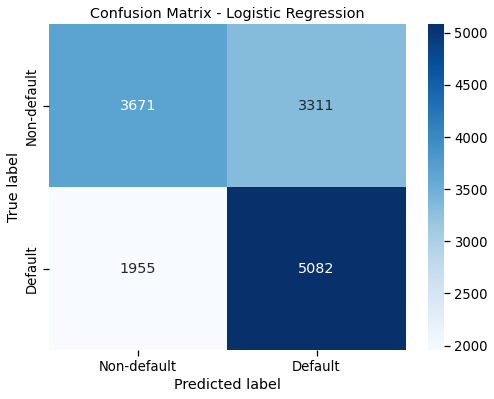

In [32]:
plt.figure(figsize=(8,6))
ConfMatrix=confusion_matrix(y_test,predictions)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

<ins>Classification Report</ins>

Overall accuracy of the logistic regression is 0.62. 

For non-defaulter group, the precision, recall and f1-score are ranged from 0.53 to 0.65 while for defaulter group, they are ranged from 0.61 to 0.72.

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.53      0.58      6982
           1       0.61      0.72      0.66      7037

    accuracy                           0.62     14019
   macro avg       0.63      0.62      0.62     14019
weighted avg       0.63      0.62      0.62     14019



<ins>ROC Curve</ins>

AUC is 0.67, which is more accurate than random guess.

In [35]:
from sklearn.metrics import roc_curve, auc

In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

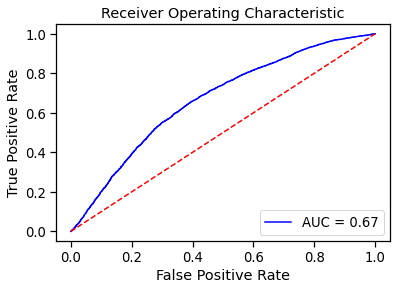

In [37]:
#plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

<ins>Feature Importance</ins>

Feature importance is a technique that assigns a score to input features based on how useful they are at predicting a target variable.

In this case, age is the most significant, followed by PAY_SEPT_2 and PAY_SEPT_1 (i.e. payment delay for 1-2 months in September). On the other hand, gender, marriage status and education are the least important in credit card default prediction.

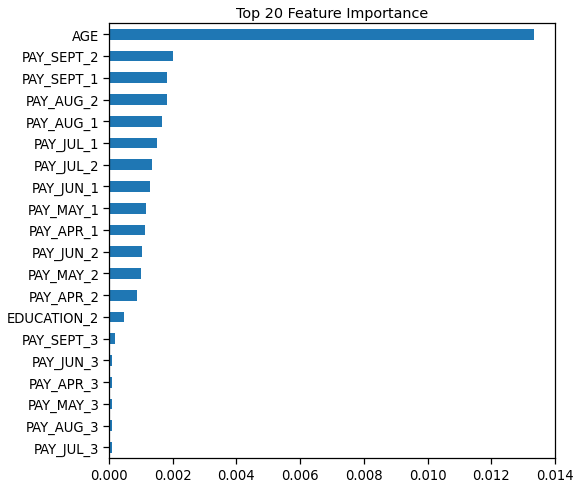

In [38]:
#get importance score of all variable
importance = logmodel.coef_[0]

#summarize feature importance
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    
#plot feature importance: Top 20 out of 67
plt.figure(figsize=(8,8))
feat_importances = pd.Series(importance,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Top 20 Feature Importance').invert_yaxis()

<AxesSubplot:title={'center':'Bottom 20 Feature Importance'}>

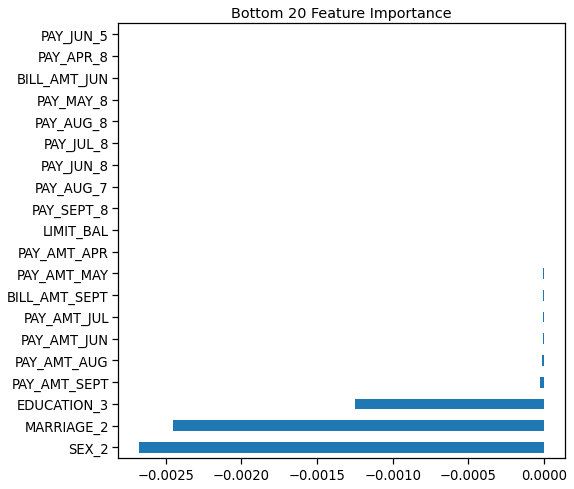

In [39]:
#plot feature importance: Bottom 20 out of 67
plt.figure(figsize=(8,8))
feat_importances.nsmallest(20).plot(kind='barh',title = 'Bottom 20 Feature Importance')

#### Hyperparameter Tuning

Here, we try to fine tuning the hyperparameters used in logistic regression to enhance the model performance.

The hyperparameters are as follows:
- Penalty: Norm of the penalty
- C: Inverse of regularization strength; smaller values specify stronger regularization
- Solver: Algorithm to use in the optimization problem

<ins>Using original dataset</ins>

Here, we used original dataset instead of balanced dataset. It is because if we performed the oversampling using SMOTE before cross validation, it may result in an inaccurate evaluation metrics while using cross-validation and overestimation of the model performance. Therefore, we used SMOTE as a part of a pipeline and did oversampling during cross validation.

In [91]:
#Do the same thing as previous but using original dataset instead of using balanced dataset
#make a copy of original dataset to perform logistic regression
df_lr2 = df.copy()

#Dummy variables
df_lr2=pd.get_dummies(data=df_lr2, columns=['SEX', 'EDUCATION','MARRIAGE'], drop_first=True)

#Drop the category "Others" from variables "Education" and "Marriage"
df_lr2.drop(['EDUCATION_4','MARRIAGE_3'],axis = 1, inplace = True)

#Dummy variables
df_lr2 = pd.get_dummies(df_lr2, columns = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR'], drop_first = True)

#Define X (input variables) and y (target variable)
X=df_lr2.drop(['IsDefaulter'], axis=1)
y=df_lr2['IsDefaulter']

#The data is splitted into training and test sets. 30% of the data for test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)


In [92]:
#For double checking
df_lr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LIMIT_BAL      30000 non-null  float64
 1   AGE            30000 non-null  int64  
 2   BILL_AMT_SEPT  30000 non-null  float64
 3   BILL_AMT_AUG   30000 non-null  float64
 4   BILL_AMT_JUL   30000 non-null  float64
 5   BILL_AMT_JUN   30000 non-null  float64
 6   BILL_AMT_MAY   30000 non-null  float64
 7   BILL_AMT_APR   30000 non-null  float64
 8   PAY_AMT_SEPT   30000 non-null  float64
 9   PAY_AMT_AUG    30000 non-null  float64
 10  PAY_AMT_JUL    30000 non-null  float64
 11  PAY_AMT_JUN    30000 non-null  float64
 12  PAY_AMT_MAY    30000 non-null  float64
 13  PAY_AMT_APR    30000 non-null  float64
 14  IsDefaulter    30000 non-null  int64  
 15  SEX_2          30000 non-null  uint8  
 16  EDUCATION_2    30000 non-null  uint8  
 17  EDUCATION_3    30000 non-null  uint8  
 18  MARRIA

<ins>Randomized Search Setting</ins>

In [22]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#Import Randomized Search
from sklearn.model_selection import RandomizedSearchCV

#Import imblearn Pipeline
from imblearn.pipeline import Pipeline

#Import stratifeid K fold
from sklearn.model_selection import RepeatedStratifiedKFold

In [128]:
# Creating imblearn Pipeline and SMOTE is a part of a pipeline
model = Pipeline(steps = [['smote', SMOTE(random_state=101)],
                          ['scaler', MinMaxScaler()],
                          ['classifier', LogisticRegression(random_state=101,
                                                            max_iter=1000)]])

# Setting K fold
stratified_kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)

# Creating the hyperparameter distribution
param_dist = [   
    {'classifier__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__solver' : ['lbfgs','newton-cg','liblinear','sag','saga']
    }
]

#Reference:
#-> penalty: Specify the norm of the penalty.
#-> C: Inverse of regularization strength; smaller values specify stronger regularization.
#-> solver: Algorithm to use in the optimization problem.
#-> max_iter: Maximum number of iterations taken for the solvers to converge, e.g. 'max_iter' : [100, 1000,2500, 5000] but it is excluded here as it takes a longer time to process

In [129]:
# Instantiating the RandomizedSearchCV object
#In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.
#The number of parameter settings that are tried is given by n_iter.

logmodel_tune = RandomizedSearchCV(estimator=model, 
                                   param_distributions = param_dist, 
                                   scoring='roc_auc',
                                   cv=stratified_kfold,
                                   n_jobs=-1,
                                   random_state=101)

#Reference:
#-> n_jobs: Number of jobs to run in parallel. -1 means using all processors.

#1) GridSearchCV :
#Try every combination of a present list of values of the hyper-parameters and choose the best combination based on the cross validation score.
#- It takes a lot of time to fit (because it will try all the combinations)
#+ gives us the best hyper-parameters.

#2) RandomSearchCV :
#Try random combinations of a range of values (we have to define the number of iterations). 
#It is good at testing a wide range of values and normally it reaches a very good combination very fast
#But the problem that it doesn’t guarantee to give the best parameter combination because not all parameter values are tried out (recommended for big datasets or high number of parameters to tune.

<ins>Training and Predicting</ins>

In [130]:
best_logmodel = logmodel_tune.fit(X_train,y_train)

/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/p

<ins>Training Result</ins>

In [132]:
# summarize all results
means = best_logmodel.cv_results_['mean_test_score']
stds = best_logmodel.cv_results_['std_test_score']
params = best_logmodel.cv_results_['params']
n=0
for mean, stdev, param in zip(means, stds, params):
    n+=1
    print("{}. Average Test Score: {:.4f} (STDEV: {:.4f}) with hyperparameter: {}".format(n, mean, stdev, param))

1. Average Test Score: nan (STDEV: nan) with hyperparameter: {'classifier__solver': 'newton-cg', 'classifier__penalty': 'l1', 'classifier__C': 0.1}
2. Average Test Score: 0.6829 (STDEV: 0.0118) with hyperparameter: {'classifier__solver': 'newton-cg', 'classifier__penalty': 'l2', 'classifier__C': 1}
3. Average Test Score: 0.6856 (STDEV: 0.0116) with hyperparameter: {'classifier__solver': 'saga', 'classifier__penalty': 'l1', 'classifier__C': 1}
4. Average Test Score: nan (STDEV: nan) with hyperparameter: {'classifier__solver': 'newton-cg', 'classifier__penalty': 'elasticnet', 'classifier__C': 0.01}
5. Average Test Score: nan (STDEV: nan) with hyperparameter: {'classifier__solver': 'lbfgs', 'classifier__penalty': 'l1', 'classifier__C': 10}
6. Average Test Score: nan (STDEV: nan) with hyperparameter: {'classifier__solver': 'newton-cg', 'classifier__penalty': 'elasticnet', 'classifier__C': 10}
7. Average Test Score: 0.6845 (STDEV: 0.0116) with hyperparameter: {'classifier__solver': 'newton-

<ins>Logistric Regression with Optimal Hyperparameters</ins>

In [134]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(best_logmodel.best_params_))
print("Best score is {}".format(best_logmodel.best_score_))

Tuned Logistic Regression Parameters: {'classifier__solver': 'saga', 'classifier__penalty': 'l1', 'classifier__C': 1}
Best score is 0.6855804662587703


<ins>Accuracy Improvement after Model Fine-Tuning</ins>

In [135]:
#from imblearn.over_sampling import SMOTE #run previously
from sklearn.metrics import accuracy_score

In [150]:
#Using Stratified instead of KFold
#1. KFold: cross-validator that divides the dataset into k folds.
#2. Stratified: Esure that each fold of dataset has the same proportion of observations with a given label
#3. RepeatedStratifiedKFold: Repeats Stratified K-Fold n times with different randomization in each repetition.

#We should prefer RepeatedStratifiedKFold/StratifiedKFold over KFold when dealing with classification tasks with imbalanced class distributions.

kf = RepeatedStratifiedKFold(n_splits=10,random_state=101)

In [162]:
#Empty lists to contain number of fold and the accuracy scores
fold = []
scr1 = []
scr2 = []

#Get the list of predictor variables
features = X.columns

#Model setting
#logmodel = LogisticRegression(solver='liblinear',random_state=101) #already run previously
logmodel2 = LogisticRegression(solver='saga', C=1, penalty='l1',random_state=101)

#Model prediction and evaluation
for i,(train_index, test_index) in enumerate(kf.split(X,y)):
    training = df_lr2.iloc[train_index,:]
    valid = df_lr2.iloc[test_index,:]
    
    X_train = training[features]
    Y_train = training['IsDefaulter']
    
    X_test = valid[features]
    Y_test = valid['IsDefaulter']
    
    sm = SMOTE()
    
    X_train_oversampled, Y_train_oversampled = sm.fit_resample(X_train, Y_train) #SMOTE
    
    fold.append(i+1)
    
    #Original model (without fine tuning)
    logmodel.fit(X_train_oversampled,Y_train_oversampled)
    pred1 = logmodel.predict(X_test)
    score1 = accuracy_score(y_true = Y_test, y_pred = pred1)
    scr1.append(score1)
    
    #New model with optimal hyperparameter
    logmodel2.fit(X_train_oversampled,Y_train_oversampled)
    pred2 = logmodel2.predict(X_test)
    score2 = accuracy_score(y_true = Y_test, y_pred = pred2)
    scr2.append(score2)
    
#create dataframes containing accuracy scores
performance1 = pd.DataFrame({'Score':scr1,'Fold':fold})
performance2 = pd.DataFrame({'Score':scr2,'Fold':fold})

/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/p

/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/p

/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/p

In the graph below, it shows that the accuracy is greatly improved from around 0.55 to 0.70 after adjusting the hyperparameters.

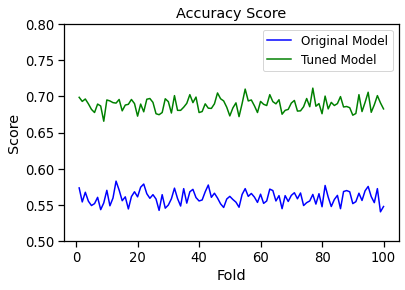

In [164]:
#Plot accuracy of logistic regression using different cross-validation
sns.lineplot(data=performance1,x='Fold',y='Score',color='b')
sns.lineplot(data=performance2,x='Fold',y='Score',color='g')

plt.title("Accuracy Score")
plt.ylim(0.5,0.8)
plt.legend(labels=["Original Model","Tuned Model"],loc='best',fontsize=12)


<ins>Feature Importance</ins>

After fine tuning the hyperparameters of logistic regression, the feature importance changed.

Age and the record of payment delay for 1-2 months in September are no longer significant. Instead, the bill amount during Apr-May and Jul-Aug 2005 are the most important on predicting credit card default. 

Interestingly on the other hand, the payment amount during May-Jun and Aug-Sep 2005 are the least important in credit card default prediction.

/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


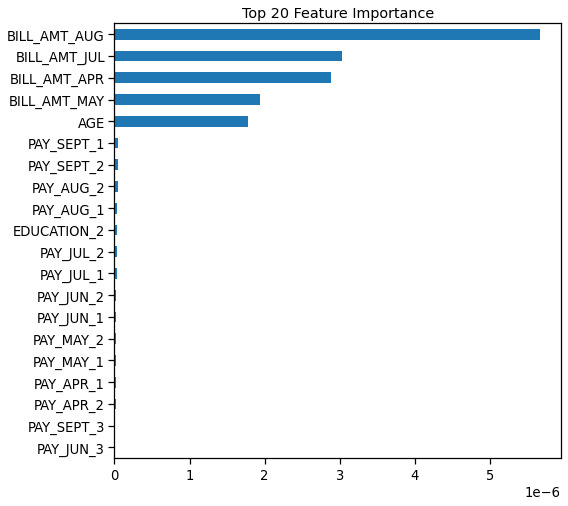

In [23]:
X=df_lr.drop(['IsDefaulter'], axis=1)
y=df_lr['IsDefaulter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

logmodel2 = LogisticRegression(solver='saga', C=1, penalty='l1',random_state=101)
logmodel2.fit(X_train,y_train)

#get importance score of all variable
importance = logmodel2.coef_[0]

#summarize feature importance
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    
#plot feature importance: Top 20 out of 67
plt.figure(figsize=(8,8))
feat_importances = pd.Series(importance,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Top 20 Feature Importance').invert_yaxis()

<AxesSubplot:title={'center':'Bottom 20 Feature Importance'}>

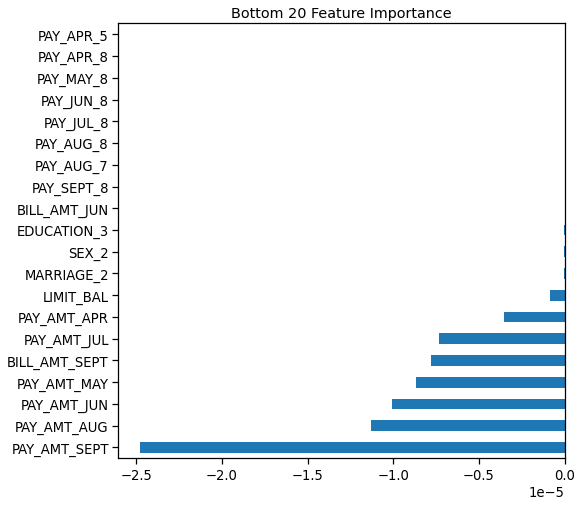

In [24]:
#plot feature importance: Bottom 20 out of 67
plt.figure(figsize=(8,8))
feat_importances.nsmallest(20).plot(kind='barh',title = 'Bottom 20 Feature Importance')

### 3.2. Tree Model

In [25]:
#Make a copy of balanced dataset to perform tree model
df_tree = balance_df.copy()

**Train Test Split**

Define X (input variables) and y (target variable).

In [16]:
X2=df_tree.drop(['IsDefaulter'], axis=1)
y2=df_tree['IsDefaulter']

The data is splitted into training and test sets. 30% of the data for test set.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=101)

**Training and Predicting**

We'll start just by training a single decision tree.

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier(random_state=101)

In [21]:
dtree=dtree.fit(X_train2,y_train2)

<ins>Structure of Decision Tree</ins>

In [39]:
#Depth of the decision tree.
print('Tree Depth: {}'.format(dtree.get_depth()))

#Number of leaves of the decision tree.
print('Number of Leaves: {}'.format(dtree.get_n_leaves()))

#Number of nodes (i.e. The number of nodes (internal nodes + leaves) in the tree.)
print('Number of Nodes: {}'.format(dtree.tree_.node_count))

Tree Depth: 39
Number of Leaves: 5068
Number of Nodes: 10135


<ins>Visualising Decision Tree</ins>

It seems like that the default decision tree is very complex. So it may face the overfitting problem.

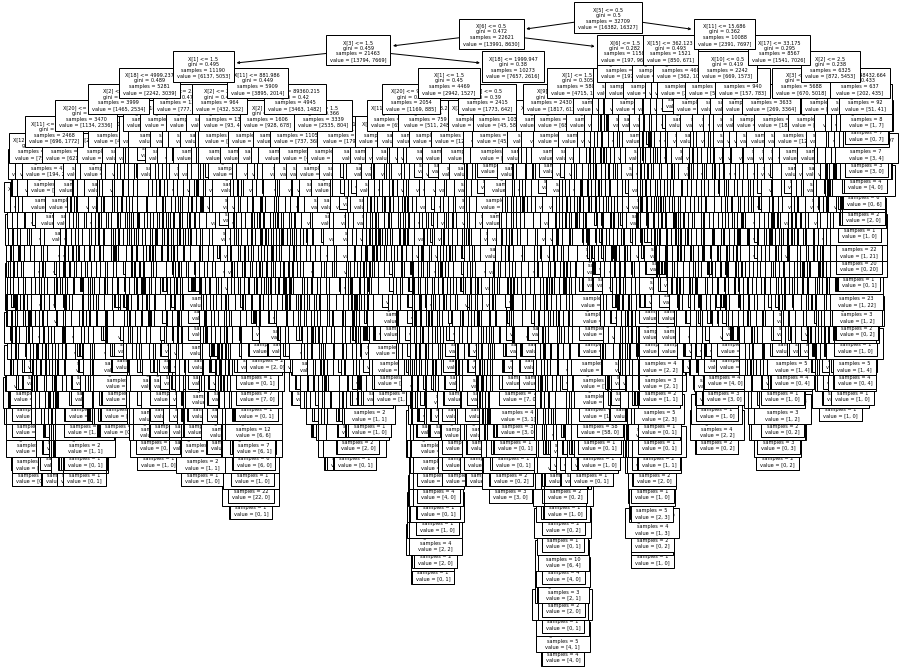

In [40]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 12))
tree.plot_tree(dtree, fontsize=5)
plt.show()

In [41]:
#Do the prediction
predictions = dtree.predict(X_test2)
probs = dtree.predict_proba(X_test2)

**Evaluation**

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

<ins>Confusion Matrix</ins>

Total entries in testing set: 14,019 (30% of dataset)

- True negative: 5,090
- True positive: 5,354
- False positive: 1,892
- False negative: 1,683

Based on the color showed in confusion matrix, we could know that most of the records were predicted as defaulted correctly (i.e. true positive), followed by true negative, false positive and false negative. The model performance is not bad on default prediction.

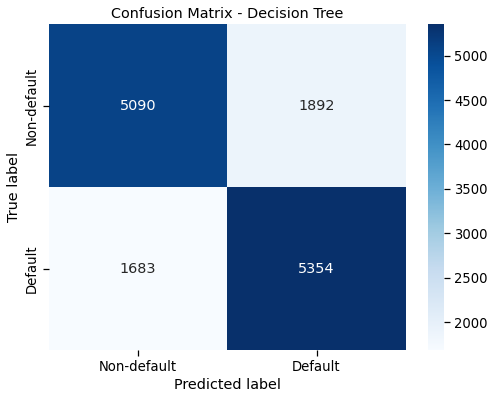

In [43]:
plt.figure(figsize=(8,6))
ConfMatrix=confusion_matrix(y_test2,predictions)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

<ins>Classification Report</ins>

Overall accuracy of the logistic regression is 0.74, which performed better than logistic regression.

For non-defaulter group, the precision, recall and f1-score are ranged from 0.73 to 0.75 while for defaulter group, they are ranged from 0.74 to 0.76.

In [44]:
print(classification_report(y_test2,predictions))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      6982
           1       0.74      0.76      0.75      7037

    accuracy                           0.74     14019
   macro avg       0.75      0.74      0.74     14019
weighted avg       0.75      0.74      0.74     14019



<ins>ROC Curve</ins>

AUC score is 0.75, which is higher than logistic regression.

In [45]:
from sklearn.metrics import roc_curve, auc

In [46]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test2, probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

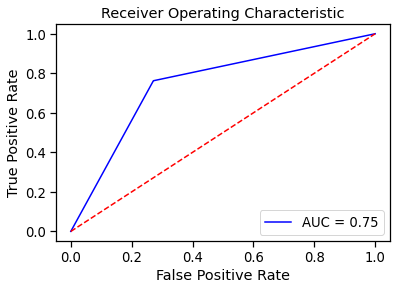

In [47]:
#plot AUC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

<ins>Feature Importance</ins>

In this case, PAY_SEPT and BILL_AMT_SEPT (i.e. payment delay status and bill amount in September respectively) are the most important in credit card default prediction among 23 variables. On the other hand, the repayment status during Apr-Jul 2005 are the least important.

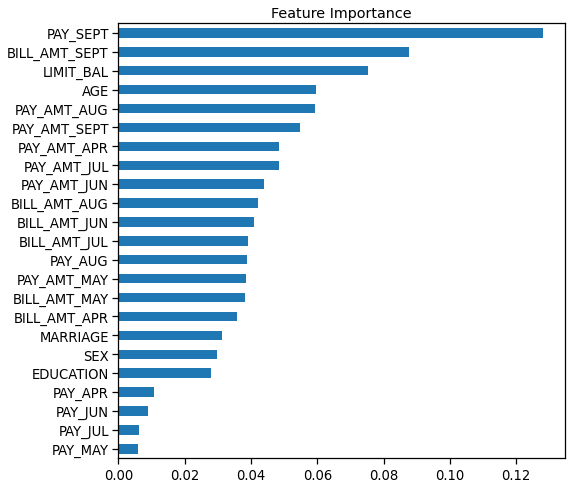

In [48]:
#get importance score of all variable
importance = dtree.feature_importances_
    
#plot feature importance of 23 variables
plt.figure(figsize=(8,8))
feat_importances = pd.Series(importance,index=X_train2.columns).sort_values(ascending=False)
feat_importances.plot(kind='barh',title = 'Feature Importance').invert_yaxis()

#### Hyperparameter Tuning

Now, let's find the optimal hyperparameters to avoid overfitting and enhance accuracy. Common hyperparameters are as follows:

- **criterion**: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain


- **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


- **min_samples_split**: The minimum number of samples required to split an internal node


- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.


- **max_features**: The number of features to consider when looking for the best split:


- **max_leaf_nodes**: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

In [49]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#Import Randomized Search
from sklearn.model_selection import RandomizedSearchCV

#Import imblearn Pipeline
from imblearn.pipeline import Pipeline

#Import stratifeid K fold
from sklearn.model_selection import RepeatedStratifiedKFold


In [50]:
#Using original dataset and perform SMOTE during cross validation

#Make a copy of original dataset to perform tree model
df_tree2 = df.copy()

#Define X (input variables) and y (target variable).
X2=df_tree2.drop(['IsDefaulter'], axis=1)
y2=df_tree2['IsDefaulter']

#The data is splitted into training and test sets. 30% of the data for test set.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=101)

In [51]:
# Creating imblearn Pipeline and SMOTE is a part of a pipeline
model = Pipeline(steps = [['smote', SMOTE(random_state=101)],
                          ['scaler', MinMaxScaler()],
                          ["classifier", DecisionTreeClassifier(random_state=101)]])

# Setting K fold
stratified_kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)

# Creating the hyperparameter distribution
param_dist = [{'classifier__criterion' : ['gini','entropy'],
     'classifier__max_depth': np.arange(3, 10),
     'classifier__min_samples_split': [5,10,20,50,100,200],
     'classifier__min_samples_leaf': [5,10,20,50,100,200],
     'classifier__max_features': [5,10,20],
     'classifier__max_leaf_nodes': [5,10,20,100,200]}]

# Instantiating the RandomizedSearchCV object
#In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.
dtree_tune = RandomizedSearchCV(estimator=model, 
                                param_distributions = param_dist, 
                                scoring='roc_auc',
                                cv=stratified_kfold,
                                n_jobs=-1,
                                random_state=101)

<ins>Training and predicting</ins>

In [52]:
best_dtree = dtree_tune.fit(X_train2,y_train2)

<ins>Training Result</ins>

In [53]:
# summarize all results
means = best_dtree.cv_results_['mean_test_score']
stds = best_dtree.cv_results_['std_test_score']
params = best_dtree.cv_results_['params']
n=0
for mean, stdev, param in zip(means, stds, params):
    n+=1
    print("{}. Average Test Score: {:.4f} (STDEV: {:.4f}) with hyperparameter: {}".format(n, mean, stdev, param))

1. Average Test Score: 0.7303 (STDEV: 0.0113) with hyperparameter: {'classifier__min_samples_split': 50, 'classifier__min_samples_leaf': 100, 'classifier__max_leaf_nodes': 20, 'classifier__max_features': 5, 'classifier__max_depth': 5, 'classifier__criterion': 'entropy'}
2. Average Test Score: 0.7235 (STDEV: 0.0134) with hyperparameter: {'classifier__min_samples_split': 200, 'classifier__min_samples_leaf': 200, 'classifier__max_leaf_nodes': 20, 'classifier__max_features': 20, 'classifier__max_depth': 5, 'classifier__criterion': 'gini'}
3. Average Test Score: 0.7244 (STDEV: 0.0142) with hyperparameter: {'classifier__min_samples_split': 200, 'classifier__min_samples_leaf': 100, 'classifier__max_leaf_nodes': 20, 'classifier__max_features': 10, 'classifier__max_depth': 5, 'classifier__criterion': 'gini'}
4. Average Test Score: 0.7212 (STDEV: 0.0167) with hyperparameter: {'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 10, 'classifier__max_leaf_nodes': 100, 'classifier__

<ins>Decision Tree with Optimal Hyperparameters</ins>

In [54]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(best_dtree.best_params_))
print("Best score is {}".format(best_dtree.best_score_))

Tuned Decision Tree Parameters: {'classifier__min_samples_split': 50, 'classifier__min_samples_leaf': 100, 'classifier__max_leaf_nodes': 20, 'classifier__max_features': 5, 'classifier__max_depth': 5, 'classifier__criterion': 'entropy'}
Best score is 0.730261679565406


<ins>Accuracy Improvement after Model Fine-Tuning</ins>

In [55]:
#from imblearn.over_sampling import SMOTE #run previously
from sklearn.metrics import accuracy_score

In [56]:
#Using Stratified instead of KFold
#1. KFold: cross-validator that divides the dataset into k folds.
#2. Stratified: Esure that each fold of dataset has the same proportion of observations with a given label
#3. RepeatedStratifiedKFold: Repeats Stratified K-Fold n times with different randomization in each repetition.

#We should prefer RepeatedStratifiedKFold/StratifiedKFold over KFold when dealing with classification tasks with imbalanced class distributions.

kf = RepeatedStratifiedKFold(n_splits=10,random_state=101)

In [57]:
#Empty lists to contain number of fold and the accuracy scores
fold = []
scr1 = []
scr2 = []

#Get the list of predictor variables
features = X2.columns

#Model setting
#dtree = DecisionTreeClassifier(random_state=101) #already run previously
dtree2 = DecisionTreeClassifier(min_samples_split=50, min_samples_leaf=100,max_leaf_nodes=20, 
                                max_features=5,max_depth=5,criterion='entropy',random_state=101)

#Model prediction and evaluation
for i,(train_index, test_index) in enumerate(kf.split(X2,y2)):
    training = df_tree2.iloc[train_index,:]
    valid = df_tree2.iloc[test_index,:]
    
    X_train = training[features]
    Y_train = training['IsDefaulter']
    
    X_test = valid[features]
    Y_test = valid['IsDefaulter']
    
    sm = SMOTE()
    
    X_train_oversampled, Y_train_oversampled = sm.fit_resample(X_train, Y_train) #SMOTE
    
    fold.append(i+1)
    
    #Original model (without fine tuning)
    dtree.fit(X_train_oversampled,Y_train_oversampled)
    pred1 = dtree.predict(X_test)
    score1 = accuracy_score(y_true = Y_test, y_pred = pred1)
    scr1.append(score1)
    
    #New model with optimal hyperparameter
    dtree2.fit(X_train_oversampled,Y_train_oversampled)
    pred2 = dtree2.predict(X_test)
    score2 = accuracy_score(y_true = Y_test, y_pred = pred2)
    scr2.append(score2)
    
#create dataframes containing accuracy scores
performance1 = pd.DataFrame({'Score':scr1,'Fold':fold})
performance2 = pd.DataFrame({'Score':scr2,'Fold':fold})

In the graph below, it shows that the accuracy is greatly improved from around 0.68 to 0.75 after adjusting the hyperparameters.

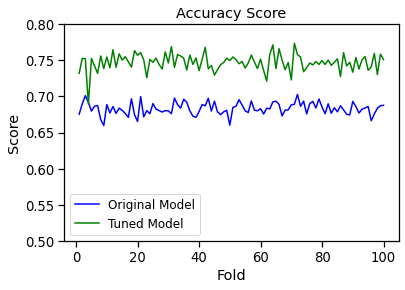

In [58]:
#Plot accuracy of logistic regression using different cross-validation
sns.lineplot(data=performance1,x='Fold',y='Score',color='b')
sns.lineplot(data=performance2,x='Fold',y='Score',color='g')

plt.title("Accuracy Score")
plt.ylim(0.5,0.8)
plt.legend(labels=["Original Model","Tuned Model"],loc='best',fontsize=12)


<ins>Feature Importance</ins>

After fine tuning the hyperparameters, some variables are still have the same effect on credit card default prediction. PAY_SEPT (i.e. payment delay status in September) is still the most important to predict credit card default and the repayment status during Apr-Jun 2005 are less important.


On the other hand, the repayment status in July 2005 became very significant while the importance of BILL_AMT_SEPT (i.e. bill amount in September) and age dropped.

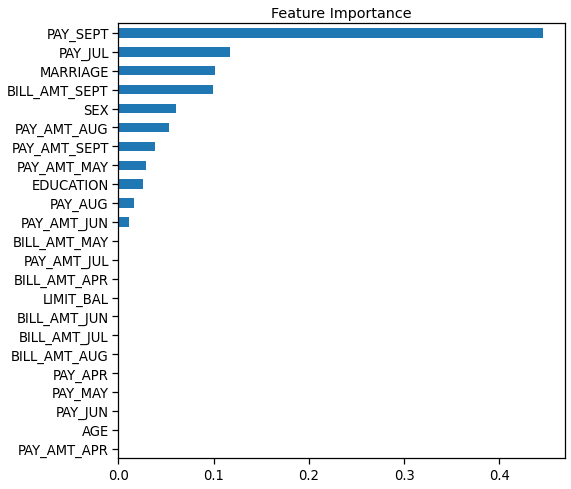

In [28]:
X2=df_tree.drop(['IsDefaulter'], axis=1)
y2=df_tree['IsDefaulter']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=101)

dtree2 = DecisionTreeClassifier(min_samples_split=50, min_samples_leaf=100,max_leaf_nodes=20, 
                                max_features=5,max_depth=5,criterion='entropy',random_state=101)
dtree2=dtree2.fit(X_train2,y_train2)

#get importance score of all variable
importance = dtree2.feature_importances_
    
#plot feature importance of 23 variables
plt.figure(figsize=(8,8))
feat_importances = pd.Series(importance,index=X_train2.columns).sort_values(ascending=False)
feat_importances.plot(kind='barh',title = 'Feature Importance').invert_yaxis()


#### Final Version of Decision Tree

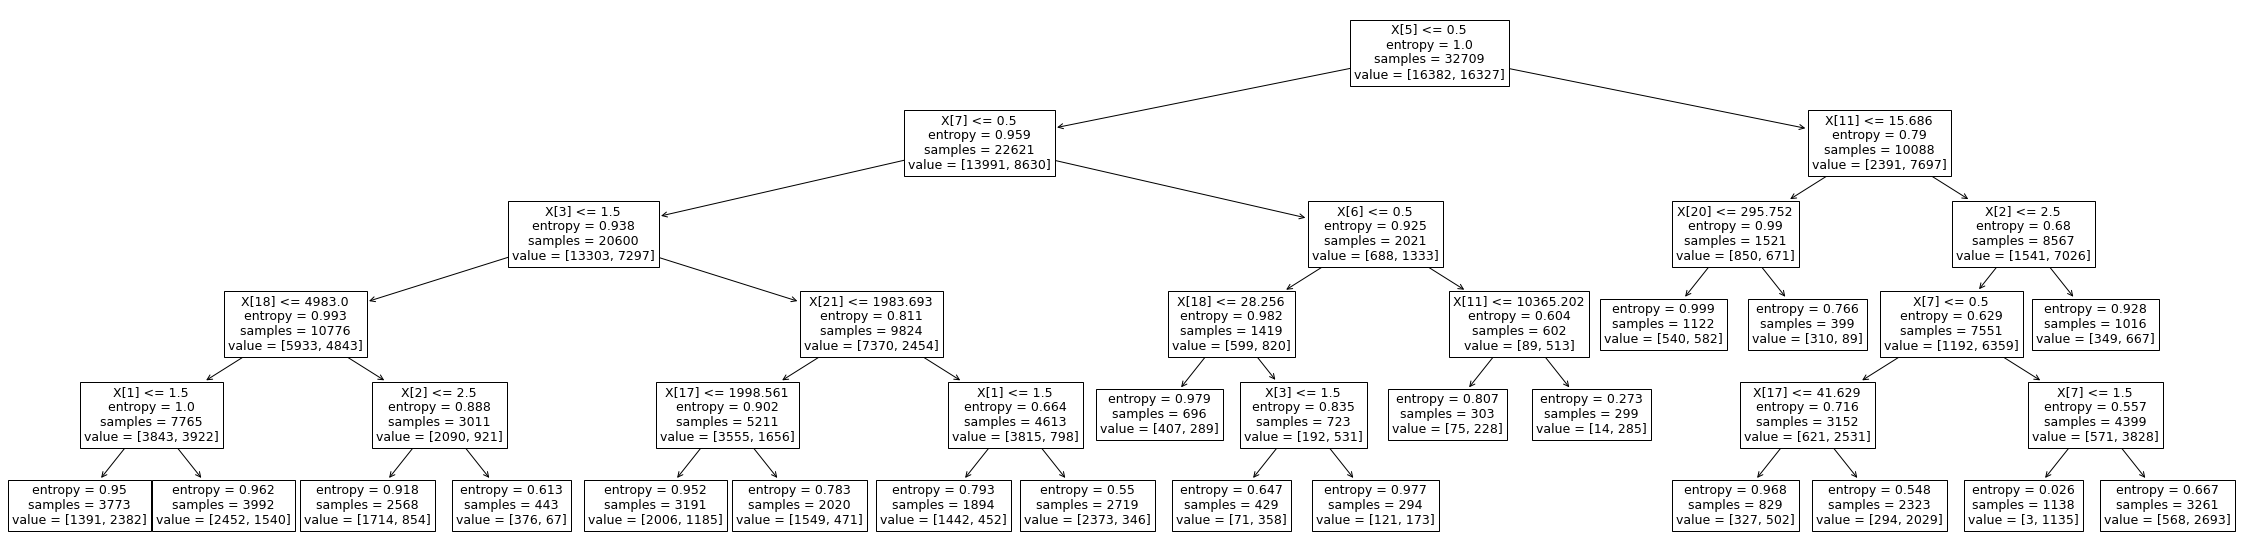

In [59]:
#Make a copy of balanced dataset to perform tree model
df_tree = balance_df.copy()

#Define X (input variables) and y (target variable)
X2=df_tree.drop(['IsDefaulter'], axis=1)
y2=df_tree['IsDefaulter']

#Train Test Split
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=101)

#Modelling
from sklearn.tree import DecisionTreeClassifier
dtree2 = DecisionTreeClassifier(min_samples_split=50, min_samples_leaf=100,max_leaf_nodes=20, 
                                max_features=5,max_depth=5,criterion='entropy',random_state=101)

dtree2=dtree2.fit(X_train2,y_train2)

from sklearn import tree

tree.plot_tree(dtree2, fontsize=12.5)
fig = plt.gcf()
fig.set_size_inches(40, 10)
plt.show()
fig.savefig('Decision_Tree.jpeg') #save as image

In [60]:
#Depth of the decision tree.
print('Tree Depth: {}'.format(dtree2.get_depth()))

#Number of leaves of the decision tree.
print('Number of Leaves: {}'.format(dtree2.get_n_leaves()))

#Number of nodes (i.e. The number of nodes (internal nodes + leaves) in the tree.)
print('Number of Nodes: {}'.format(dtree2.tree_.node_count))

Tree Depth: 5
Number of Leaves: 20
Number of Nodes: 39


### 3.3. XGBoost (Extreme Gradient Boosting)

In [29]:
#Make a copy of balanced dataset to perform tree model
df_xgb = balance_df.copy()

**Train Test Split**

Define X (input variables) and y (target variable).

In [62]:
X3=df_xgb.drop(['IsDefaulter'], axis=1)
y3=df_xgb['IsDefaulter']

The data is splitted into training and test sets. 30% of the data for test set.

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.30, random_state=101)

**Training and Predicting**

We'll start just by training a simple XGBoost.

In [31]:
#import sys
#!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier
from xgboost import plot_tree

In [66]:
#install graphvix to visualize tree
!brew install graphviz

Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
libdivide

You have 1 outdated formula installed.
You can upgrade it with brew upgrade
or list it with brew outdated.

To reinstall 7.0.0, run:
  brew reinstall graphviz


In [67]:
xgbmodel = XGBClassifier(random_state=101)

In [68]:
xgbmodel.fit(X_train3,y_train3)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, ...)

<ins>Structure of XGBoost Tree</ins>

In [69]:
#Number of trees of the XGBoost tree
dump_list = xgbmodel.get_booster().get_dump()
num_trees = len(dump_list)
print('Number of Trees: {}'.format(num_trees))


Number of Trees: 100


<ins>Visualising XGBoost Decision Tree</ins>

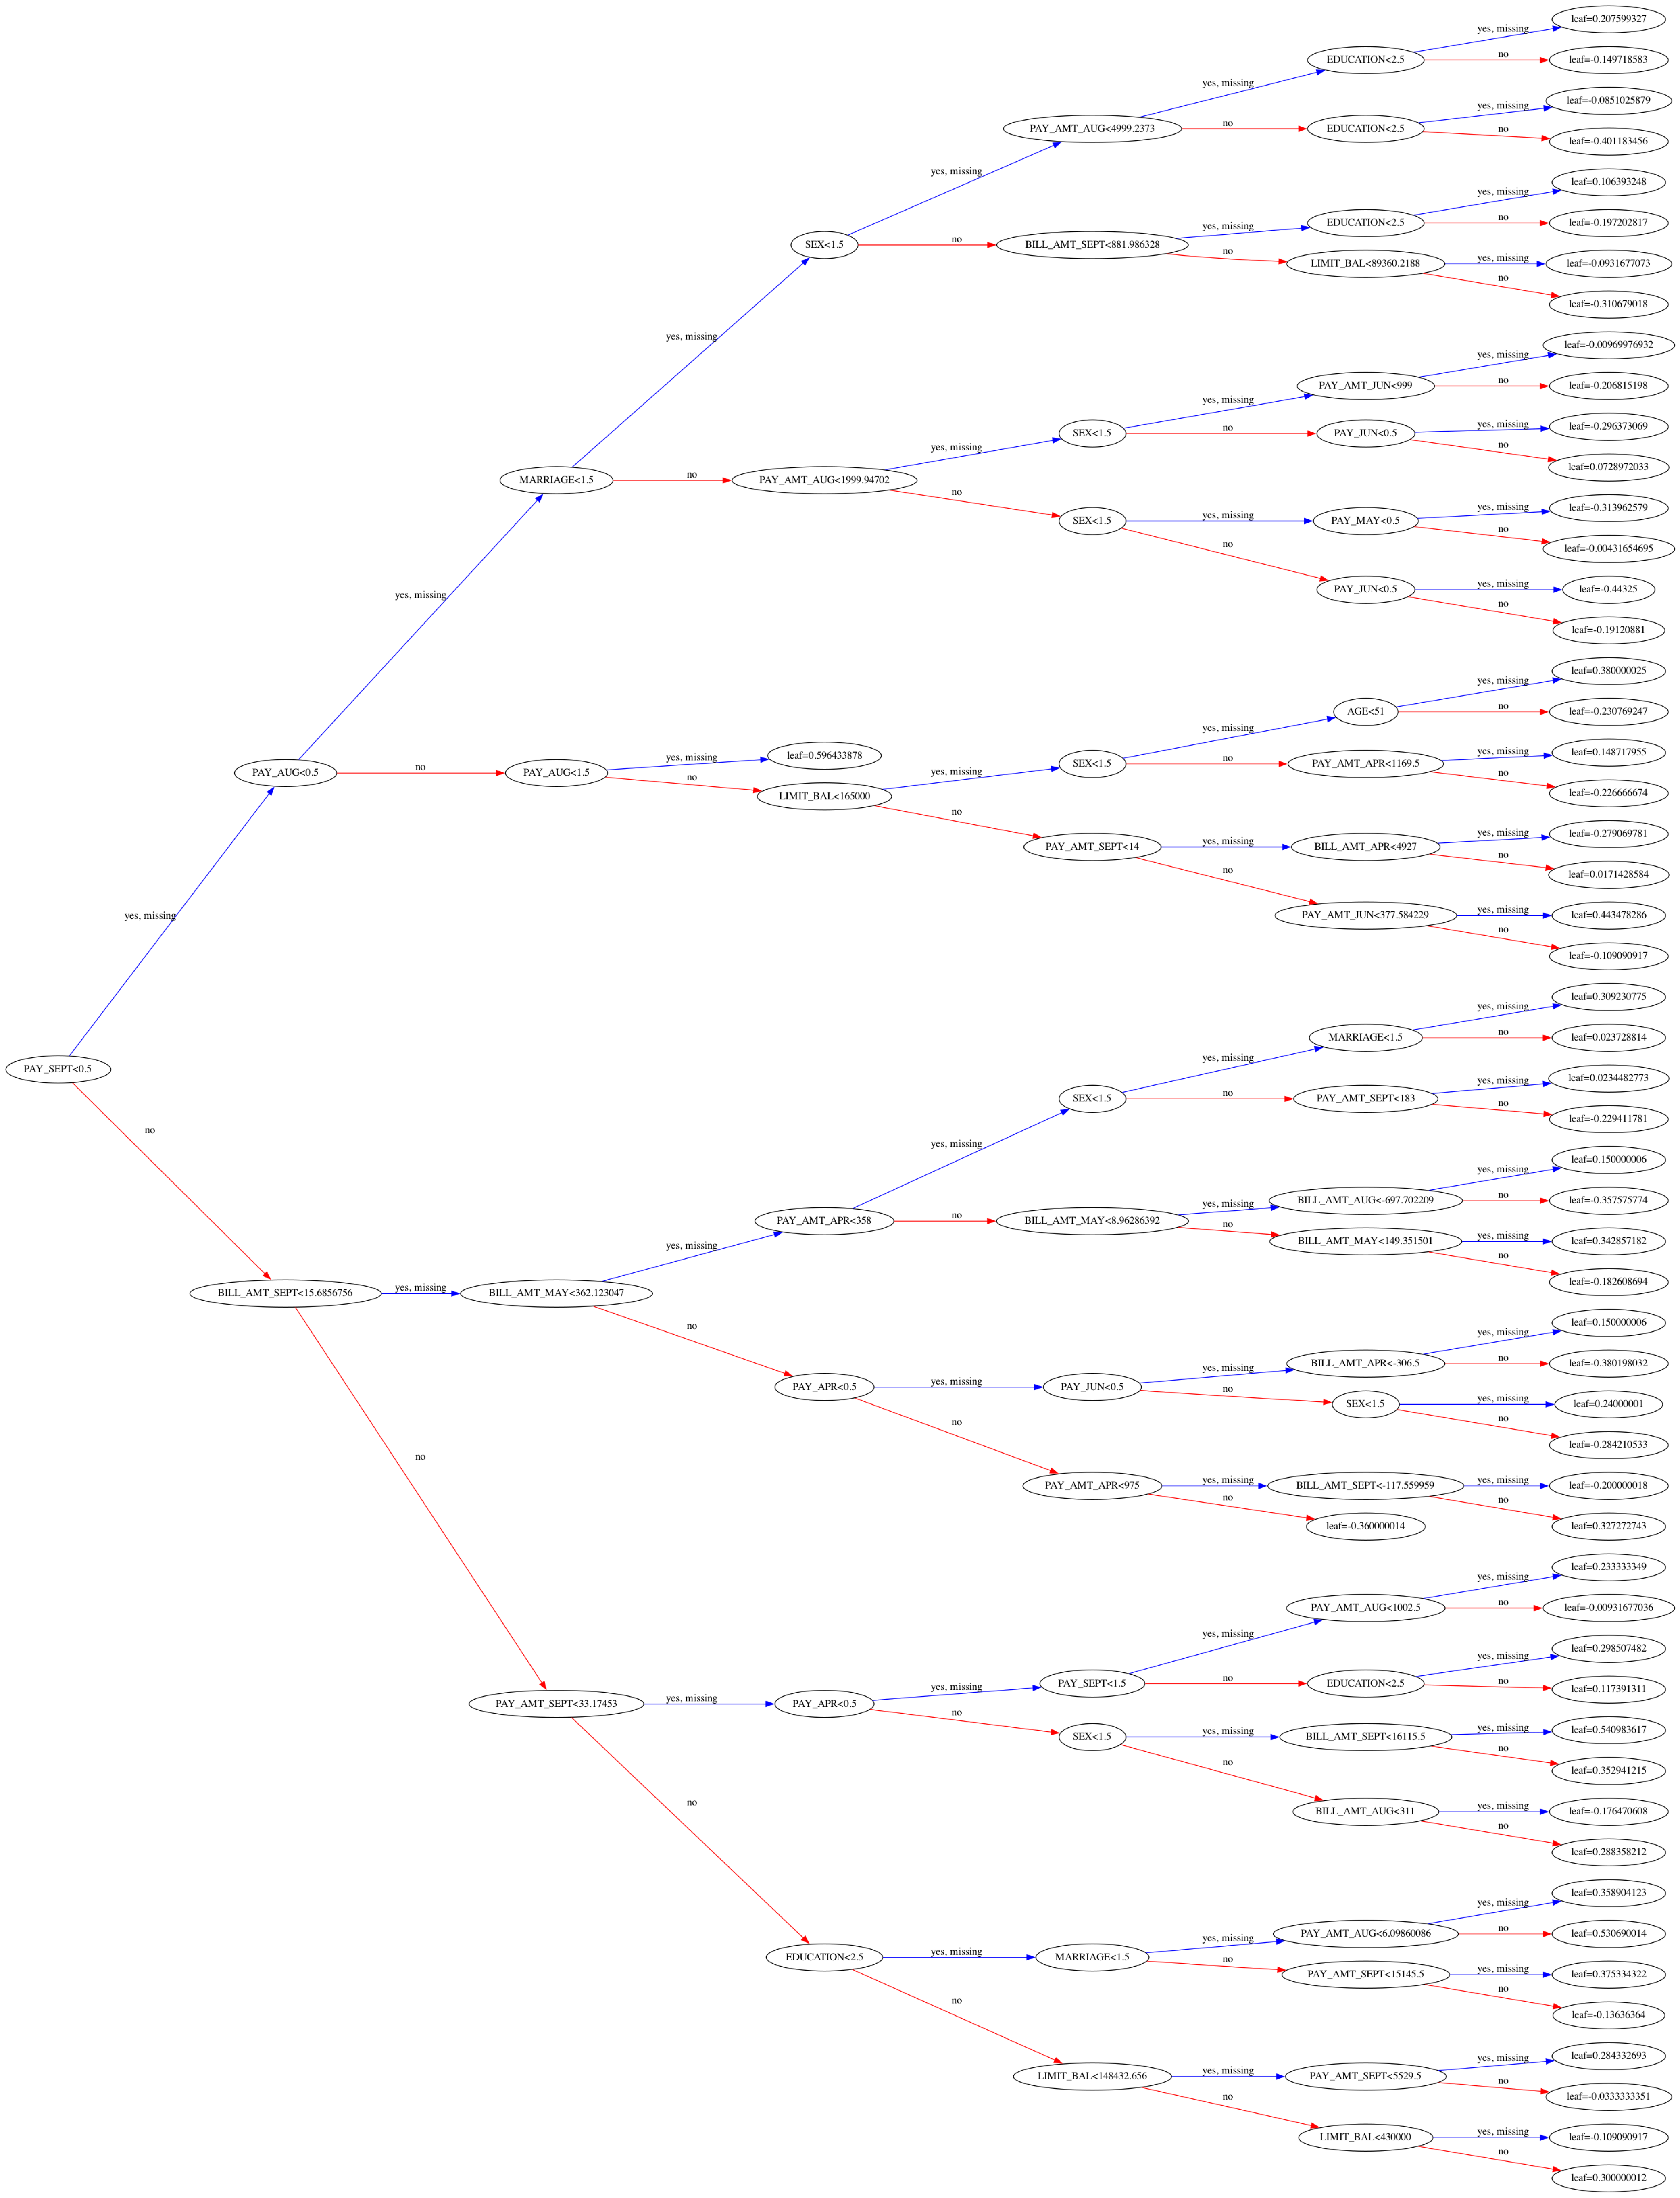

In [71]:
# plot XGBoost tree
plot_tree(xgbmodel,rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(100, 100)
plt.show()
fig.savefig('XGBoost_Tree.jpeg') #save as image

In [74]:
#Do the prediction
predictions = xgbmodel.predict(X_test3)
probs = xgbmodel.predict_proba(X_test3)

**Evaluation**

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

<ins>Confusion Matrix</ins>

Total entries in testing set: 14,019 (30% of dataset)

- True negative: 5,866
- True positive: 5,510
- False positive: 1,116
- False negative: 1,527

Based on the color showed in confusion matrix, we could know that most of the records were predicted as defaulted correctly (i.e. true negative), followed by true positive, false negative and false positive. The model performed well on default prediction.

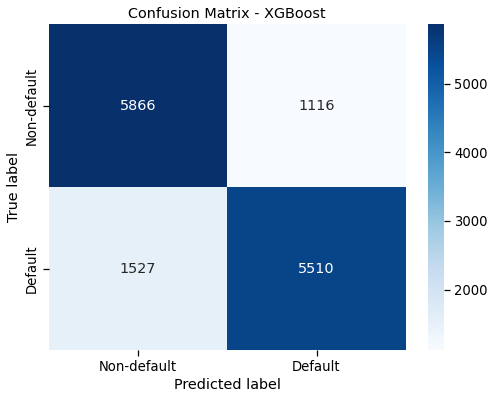

In [76]:
plt.figure(figsize=(8,6))
ConfMatrix=confusion_matrix(y_test3,predictions)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - XGBoost");

<ins>Classification Report</ins>

Overall accuracy of the logistic regression is 0.81, which performed better than logistic regression and decision tree.

For non-defaulter group, the precision, recall and f1-score are ranged from 0.79 to 0.84 while for defaulter group, they are ranged from 0.78 to 0.83.

In [77]:
print(classification_report(y_test3,predictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      6982
           1       0.83      0.78      0.81      7037

    accuracy                           0.81     14019
   macro avg       0.81      0.81      0.81     14019
weighted avg       0.81      0.81      0.81     14019



<ins>ROC Curve</ins>

AUC is 0.89, which is higher than logistic regression and decision tree.

In [78]:
from sklearn.metrics import roc_curve, auc

In [79]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test3, probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

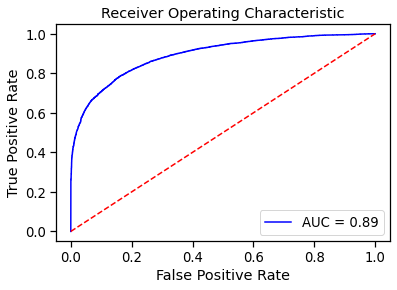

In [80]:
#plot AUC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

<ins>Feature Importance</ins>

Among 23 variables, PAY_AUG and PAY_SEPT (i.e. repayment status in Aug-Sep 2005) are the most importance to predict credit card default prediction. On the other hand, the bill amount during Apr-Jul 2005 and age are the least important 

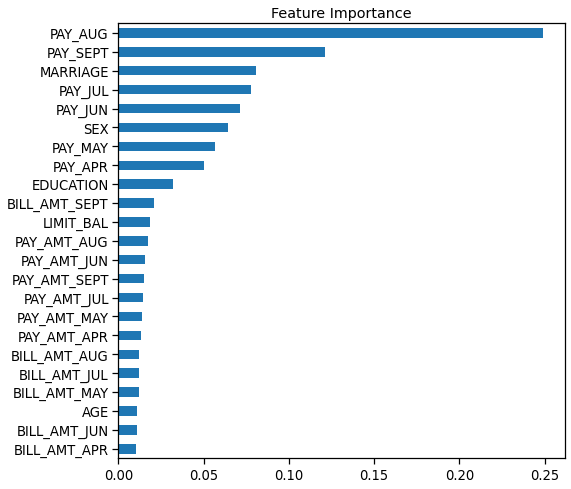

In [81]:
#get importance score of all variable
importance = xgbmodel.feature_importances_
    
#plot feature importance of 23 variables
plt.figure(figsize=(8,8))
feat_importances = pd.Series(importance,index=X_train3.columns).sort_values(ascending=False)
feat_importances.plot(kind='barh',title = 'Feature Importance').invert_yaxis()

#### Hyperparameter Tuning

We will now tune the hyperparameters in a xgboost model. Xgboost may get a better performance with careful tuning.

XGBoost's hyperparameters (https://www.datacamp.com/community/tutorials/xgboost-in-python)

The most common hyperparameters in XGBoost are as follows:

- **learning_rate**: step size shrinkage used to prevent overfitting. Range is [0,1]
- **max_depth**: determines how deeply each tree is allowed to grow during any boosting round.
- **subsample**: percentage of samples used per tree. Low value can lead to underfitting.
- **colsample_bytree**: percentage of features used per tree. High value can lead to overfitting.
- **n_estimators**: number of trees you want to build.
- **objective**: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

- **gamma**: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- **alpha**: L1 regularization on leaf weights. A large value leads to more regularization.
- **lambda**: L2 regularization on leaf weights and is smoother than L1 regularization.

In [82]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#Import Randomized Search
from sklearn.model_selection import RandomizedSearchCV

#Import imblearn Pipeline
from imblearn.pipeline import Pipeline

#Import stratifeid K fold
from sklearn.model_selection import RepeatedStratifiedKFold


In [83]:
#Using original dataset and perform SMOTE during cross validation

#Make a copy of original dataset to perform tree model
df_xgb2 = df.copy()

#Define X (input variables) and y (target variable).
X3=df_xgb2.drop(['IsDefaulter'], axis=1)
y3=df_xgb2['IsDefaulter']

#The data is splitted into training and test sets. 30% of the data for test set.
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.30, random_state=101)

In [84]:
#Creating imblearn Pipeline and SMOTE is a part of a pipeline
model = Pipeline(steps = [['smote', SMOTE(random_state=101)],
                          ['scaler', MinMaxScaler()],
                          ["classifier", XGBClassifier(random_state=101)]])

# Setting K fold
stratified_kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)

# Creating the hyperparameter distribution
param_dist = [{
    'classifier__learning_rate': [0.01,0.05,0.1],
    'classifier__max_depth': np.arange(3, 10),
    'classifier__subsample': [0.5,0.75,1],
    'classifier__colsample_bytree': [0.2,0.3,0.4,0.5],
    'classifier__n_estimators': [100, 200, 500,1000],
    #'classifier__booster': ['gbtree', 'gblinear','dart'],
    'classifier__gamma': [0, 0.5, 1, 2],
    'classifier__alpha': [0, 0.5, 1, 2],
    'classifier__lambda': [0.5, 1, 5]
}]

# Instantiating the RandomizedSearchCV object
#In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.
xgbmodel_tune = RandomizedSearchCV(estimator=model, 
                                param_distributions = param_dist, 
                                scoring='roc_auc',
                                cv=stratified_kfold,
                                n_jobs=-1,
                                random_state=101)

<ins>Training and predicting</ins>

In [85]:
best_xgbmodel = xgbmodel_tune.fit(X_train3,y_train3)

<ins>Training Result</ins>

In [86]:
# summarize all results
means = best_xgbmodel.cv_results_['mean_test_score']
stds = best_xgbmodel.cv_results_['std_test_score']
params = best_xgbmodel.cv_results_['params']
n=0
for mean, stdev, param in zip(means, stds, params):
    n+=1
    print("{}. Average Test Score: {:.4f} (STDEV: {:.4f}) with hyperparameter: {}".format(n, mean, stdev, param))

1. Average Test Score: 0.7595 (STDEV: 0.0112) with hyperparameter: {'classifier__subsample': 0.75, 'classifier__n_estimators': 500, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.01, 'classifier__lambda': 5, 'classifier__gamma': 0, 'classifier__colsample_bytree': 0.5, 'classifier__alpha': 2}
2. Average Test Score: 0.7603 (STDEV: 0.0111) with hyperparameter: {'classifier__subsample': 0.5, 'classifier__n_estimators': 200, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.01, 'classifier__lambda': 5, 'classifier__gamma': 2, 'classifier__colsample_bytree': 0.3, 'classifier__alpha': 0.5}
3. Average Test Score: 0.7467 (STDEV: 0.0114) with hyperparameter: {'classifier__subsample': 0.5, 'classifier__n_estimators': 1000, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.05, 'classifier__lambda': 1, 'classifier__gamma': 2, 'classifier__colsample_bytree': 0.3, 'classifier__alpha': 0.5}
4. Average Test Score: 0.7533 (STDEV: 0.0122) with hyperparameter: {'classifier__s

<ins>XGBoost with Optimal Hyperparameters</ins>

In [88]:
# 1st Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(best_xgbmodel.best_params_))
print("Best score is {}".format(best_xgbmodel.best_score_))

Tuned Decision Tree Parameters: {'classifier__subsample': 0.5, 'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.01, 'classifier__lambda': 0.5, 'classifier__gamma': 2, 'classifier__colsample_bytree': 0.4, 'classifier__alpha': 0.5}
Best score is 0.761907454447977


<ins>Accuracy Improvement after Model Fine-Tuning</ins>

In [89]:
#from imblearn.over_sampling import SMOTE #run previously
from sklearn.metrics import accuracy_score

In [90]:
#Using Stratified instead of KFold
#1. KFold: cross-validator that divides the dataset into k folds.
#2. Stratified: Esure that each fold of dataset has the same proportion of observations with a given label
#3. RepeatedStratifiedKFold: Repeats Stratified K-Fold n times with different randomization in each repetition.

#We should prefer RepeatedStratifiedKFold/StratifiedKFold over KFold when dealing with classification tasks with imbalanced class distributions.

kf = RepeatedStratifiedKFold(n_splits=10,random_state=101)

In [91]:
#Empty lists to contain number of fold and the accuracy scores
fold = []
scr1 = []
scr2 = []

#Get the list of predictor variables
features = X3.columns

#Model setting
xgbmodel = XGBClassifier(random_state=101) #already run previously
xgbmodel2 = XGBClassifier(subsample=0.5,n_estimators=200,max_depth=7,learning_rate=0.01,reg_lambda=0.5,
                          gamma=2,colsample_bytree=0.4,alpha=0.5,random_state=101)

#Model prediction and evaluation
for i,(train_index, test_index) in enumerate(kf.split(X3,y3)):
    training = df_xgb2.iloc[train_index,:]
    valid = df_xgb2.iloc[test_index,:]
    
    X_train = training[features]
    Y_train = training['IsDefaulter']
    
    X_test = valid[features]
    Y_test = valid['IsDefaulter']
    
    sm = SMOTE()
    
    X_train_oversampled, Y_train_oversampled = sm.fit_resample(X_train, Y_train) #SMOTE
    
    fold.append(i+1)
    
    #Original model (without fine tuning)
    xgbmodel.fit(X_train_oversampled,Y_train_oversampled)
    pred1 = xgbmodel.predict(X_test)
    score1 = accuracy_score(y_true = Y_test, y_pred = pred1)
    scr1.append(score1)
    
    #New model with optimal hyperparameter
    xgbmodel2.fit(X_train_oversampled,Y_train_oversampled)
    pred2 = xgbmodel2.predict(X_test)
    score2 = accuracy_score(y_true = Y_test, y_pred = pred2)
    scr2.append(score2)
    
#create dataframes containing accuracy scores
performance1 = pd.DataFrame({'Score':scr1,'Fold':fold})
performance2 = pd.DataFrame({'Score':scr2,'Fold':fold})

In the graph below, it shows that the accuracy is slightly improved after adjusting the hyperparameters. In general, the accuracy score of XGBoost (around 0.77) is higher than both logistic regression (around 0.70) and decision tree (around 0.75) even after hyperparameter tuning.

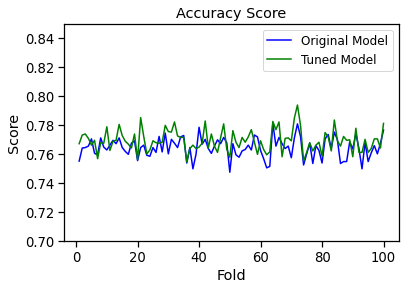

In [111]:
#Plot accuracy of logistic regression using different cross-validation
sns.lineplot(data=performance1,x='Fold',y='Score',color='b')
sns.lineplot(data=performance2,x='Fold',y='Score',color='g')

plt.title("Accuracy Score")
plt.ylim(0.70,0.85)
plt.legend(labels=["Original Model","Tuned Model"],loc='best',fontsize=12)


<ins>Feature Importance</ins>

After fine tuning the hyperparameters, the feature importance didn't change a lot.

PAY_AUG and PAY_SEPT (i.e. repayment status in Aug-Sep 2005) are still the most important while the bill amount during Apr-Jul 2005 and age are still the least important in credit card default prediction.

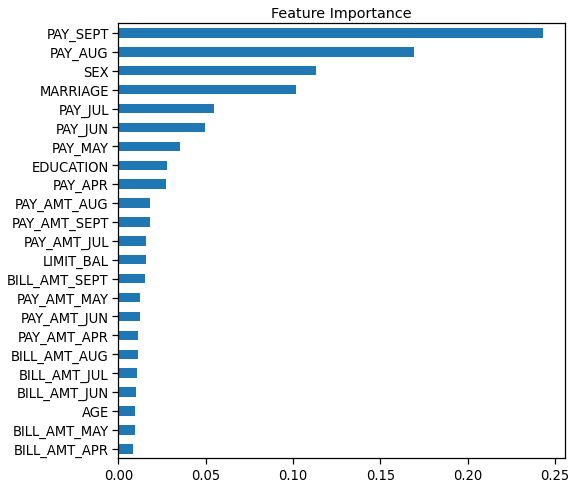

In [32]:
X3=df_xgb.drop(['IsDefaulter'], axis=1)
y3=df_xgb['IsDefaulter']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.30, random_state=101)

xgbmodel2 = XGBClassifier(subsample=0.5,n_estimators=200,max_depth=7,learning_rate=0.01,reg_lambda=0.5,
                          gamma=2,colsample_bytree=0.4,alpha=0.5,random_state=101)
xgbmodel2.fit(X_train3,y_train3)

#get importance score of all variable
importance = xgbmodel2.feature_importances_
    
#plot feature importance of 23 variables
plt.figure(figsize=(8,8))
feat_importances = pd.Series(importance,index=X_train3.columns).sort_values(ascending=False)
feat_importances.plot(kind='barh',title = 'Feature Importance').invert_yaxis()


#### Final Version of XGBoost

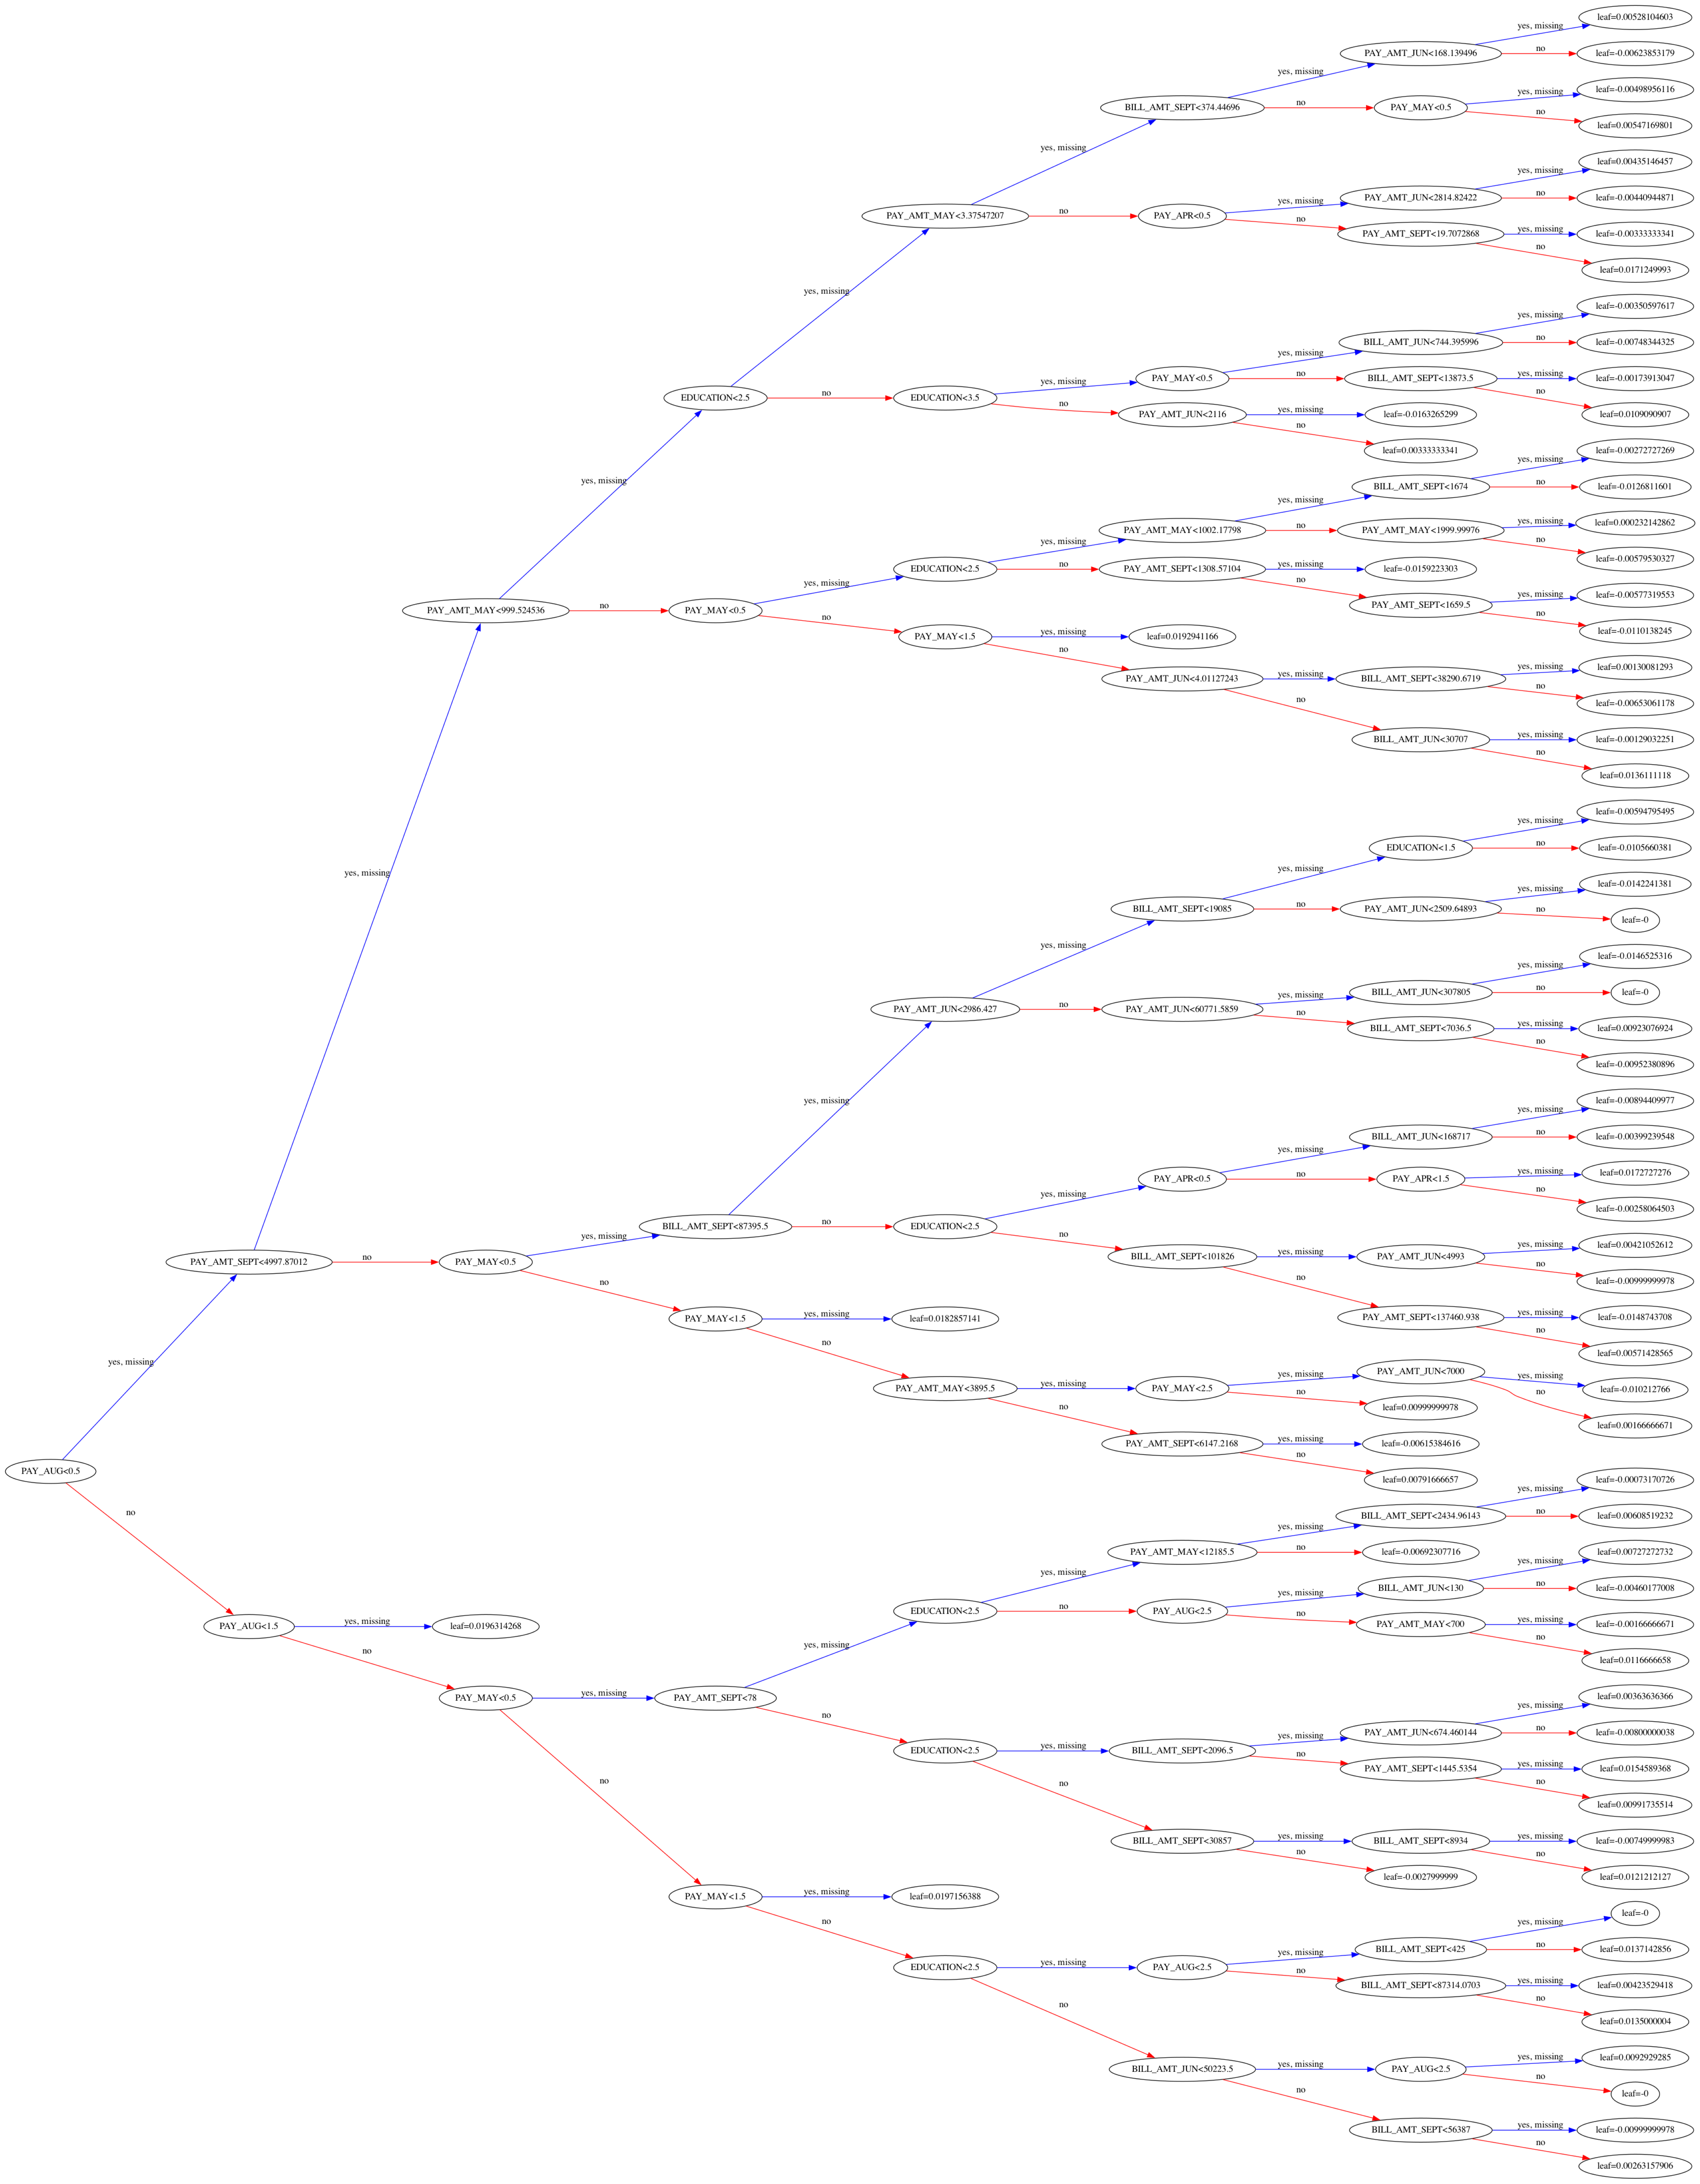

In [112]:
#Make a copy of balanced dataset to perform tree model
df_xgb = balance_df.copy()

#Define X (input variables) and y (target variable)
X3=df_xgb.drop(['IsDefaulter'], axis=1)
y3=df_xgb['IsDefaulter']

#The data is splitted into training and test sets. 30% of the data for test set.
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.30, random_state=101)

#Modelling
xgbmodel2 = XGBClassifier(subsample=0.5,n_estimators=200,max_depth=7,learning_rate=0.01,reg_lambda=0.5,
                          gamma=2,colsample_bytree=0.4,alpha=0.5,random_state=101)
xgbmodel2.fit(X_train3,y_train3)

# plot XGBoost tree
plot_tree(xgbmodel2,rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(100, 100)
plt.show()
fig.savefig('XGBoost_Tree_Final.jpeg') #save as image

## 4. Algorithm Selection

Now let's compare multiple machine learning algorithms consistently. We will compare 3 algorithms - Logistic Regression, Decision Tree and XGBoost.

In [114]:
# import different algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# get accuracy score
from sklearn.metrics import accuracy_score

In [146]:
#Optimal models from above session

logmodel2 = LogisticRegression(solver='saga', C=1, penalty='l1',random_state=101)

dtree2 = DecisionTreeClassifier(min_samples_split=50, min_samples_leaf=100,max_leaf_nodes=20, 
                                max_features=5,max_depth=5,criterion='entropy',random_state=101)

xgbmodel2 = XGBClassifier(subsample=0.5,n_estimators=200,max_depth=7,learning_rate=0.01,reg_lambda=0.5,
                          gamma=2,colsample_bytree=0.4,alpha=0.5,random_state=101)

#Prepare models
models=[]
models.append(('LR',logmodel2)) #Logistic Regression
models.append(('DTC',dtree2)) #Decision Tree
models.append(('XGB',xgbmodel2)) #XGBoost

### Accuracy Score

XGBoost is the optimal model among 3 tuned models we have. 

It has the highest accuracy score, which is 0.78, followed by decision tree (0.72) and logistic regression (0.58)

In [134]:
#Make a copy of balanced dataset to perform tree model
df_final = balance_df.copy()

X=df_final.drop(['IsDefaulter'], axis=1)
y=df_final['IsDefaulter']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [135]:
#Prepare dummy variables for logistic regression
df_lr = balance_df.copy()

#Dummy variables
df_lr=pd.get_dummies(data=df_lr, columns=['SEX', 'EDUCATION','MARRIAGE'], drop_first=True)

#Drop the category "Others" from variables "Education" and "Marriage"
df_lr.drop(['EDUCATION_4','MARRIAGE_3'],axis = 1, inplace = True)

#Dummy variables
df_lr = pd.get_dummies(df_lr, columns = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR'], drop_first = True)

X2=df_lr.drop(['IsDefaulter'], axis=1)
y2=df_lr['IsDefaulter']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, stratify=y, random_state=101)


In [148]:
# evaluate each model in turn
for name, model in models:
    if name !='LR':
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        ac_score=accuracy_score(y_test,predictions)
    else:
        model.fit(X_train2,y_train2)
        predictions = model.predict(X_test2)
        ac_score=accuracy_score(y_test2,predictions)
        
    msg="%s: %f" % (name, ac_score)
    print(msg)  

/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LR: 0.575576
DTC: 0.720023
XGB: 0.780512


### ROC Curve

XGBoost is the optimal model among 3 tuned models we have. 

It has the highest AUC score, which is 0.86, followed by decision tree (0.78) and logistic regression (0.65)

In [149]:
from sklearn.metrics import roc_curve, auc

In [150]:
# Logistic Regression 
lr=logmodel2
lr.fit(X_train2, y_train2)
lr_predict_probs=lr.predict_proba(X_test2)[:,1]
lr_fpr, lr_tpr, lr_thr=roc_curve(y_test2,lr_predict_probs)
lr_roc_auc=auc(lr_fpr,lr_tpr)

# Decision Tree
dt=dtree2
dt.fit(X_train, y_train)
dt_predict_probs=dt.predict_proba(X_test)[:,1]
dt_fpr, dt_tpr, dt_thr=roc_curve(y_test,dt_predict_probs)
dt_roc_auc=auc(dt_fpr,dt_tpr)

# XGBoost
xgb=xgbmodel2
xgb.fit(X_train, y_train)
xgb_predict_probs=xgb.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, xgb_thr=roc_curve(y_test,xgb_predict_probs)
xgb_roc_auc=auc(xgb_fpr,xgb_tpr)


/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


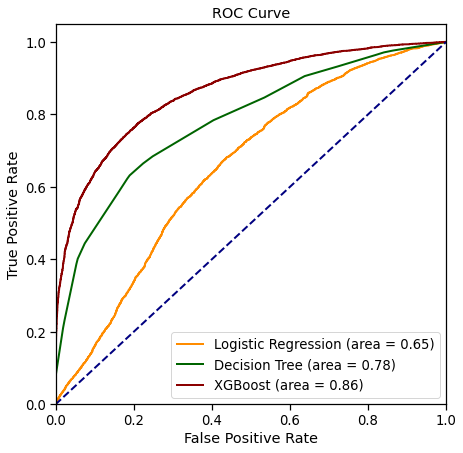

In [151]:
plt.figure(figsize=(7,7))
plt.plot(lr_fpr, lr_tpr, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot(dt_fpr, dt_tpr, color='darkgreen', lw=2, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(xgb_fpr, xgb_tpr, color='darkred', lw=2, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")

### Use cross validation

From the box plots below, the following items are identified:

- Comparing the medians of box plots: the accuracy of XGBoost is the highest while logistic regression has the lowest accuracy.

- Comparing the interquartile ranges (i.e. box lengths), to examine how the data is dispersed between each sample. The longer the box the more dispersed the data, vice versa. Here, XGBoost has the largest ranges, indicating wider distribution and more scattered data, followed by decision tree and logistic regression.

- Distribution of all 3 models: negatively skewed with different degree (XGBoost > decision tree > logistic regression)

Overally, XGBoost is the optimal model among 3 tuned models.


In [152]:
from sklearn.model_selection import cross_val_score
import time

# evaluate each model in turn
results = []
names = []

models = []
models.append(('LR',logmodel2))
models.append(('DTC',dtree2))
models.append(('XGB',xgbmodel2))


for name, model in models :
    start = time.time()
    
    if name !='LR':
        cv_results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    else:
        cv_results = cross_val_score(model, X2, y2, cv=10, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    end = time.time()
    print(end-start)

/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kawaiyim/opt/anaconda3/lib/p

LR: 0.575373 (0.012961)
56.549391984939575
DTC: 0.717044 (0.031960)
1.035017967224121
XGB: 0.774334 (0.058207)
95.12834405899048


[Text(1, 0, 'LR'), Text(2, 0, 'DTC'), Text(3, 0, 'XGB')]

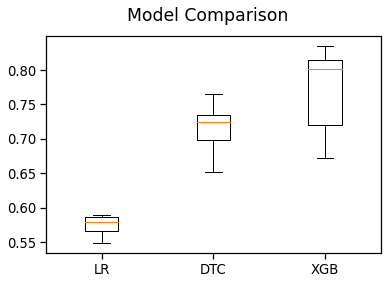

In [154]:
# Select best model

fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)


## 5. Conclusion

Among 3 tuned machind learning models, XGBoost is the optimal models comparing with logistic regression and decision tree.